In [ ]:
from google.colab import drive

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
!pip install kneed
from kneed import KneeLocator
import pickle
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Merged_GradeClass_dataset.csv')

In [ ]:
df["GradeClass"].value_counts(normalize=True) * 100

GradeClass
4    50.627090
3    17.307692
2    16.346154
1    15.719064
Name: proportion, dtype: float64

#**Balancing dataset:**#
After analyzing the distribution of the **GradeClass** variable, we observed an imbalance where class **4** represents **50.63%** of the data, while class **0** is underrepresented with only **4.47%**. This imbalance may affect the classifier's performance by favoring the majority class. However, since the dataset maintains a reasonable distribution across multiple classes, it will still provide meaningful insights during classification.

#**Classification:**
- We trained Decision Tree classifiers using (entropy and Gini index) attribute selection measures. The classifiers were evaluated across different data partition sizes, specifically:


- 70% Training and 30% Test 80% Training and 20% Test 60% Training and 40% Test

- To assess the models, we employed confusion matrices, which provide a detailed overview of the classification performance in terms of true and predicted classes. We also calculated key performance metrics based on the confusion matrices, including sensitivity, specificity, and precision:

- Sensitivity: represents how many did we correctly identify of all the actual positive cases. A higher sensitivity indicates that the model is good at identifying positive cases.

-  Specificity: represents how many did we correctly identify of all the actual negative cases. A higher specificity indicates that the model is good at identifying negative cases.

-  Precision: represents how many were actually positive of all the cases predicted as positive. A higher precision indicates that when the model predicts a positive case, it is more likely to be correct.

In [ ]:
# Define feature names
feature_names = df.columns.tolist()[:-1]  # Excluding the target column

# Define X and y
X = df[feature_names]
y = df["GradeClass"]

#reclassification dataset:

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Processed_dataset.csv")

# Merge GradeClass 0 with GradeClass 1
df['GradeClass'] = df['GradeClass'].replace(0, 1)

# Check the class distribution after modification
print("New class distribution:\n", df['GradeClass'].value_counts())

# Save the new dataset
df.to_csv("Merged_GradeClass_dataset.csv", index=False)
print("The merged dataset has been saved as 'Merged_GradeClass_dataset.csv'")


New class distribution:
 GradeClass
4    1211
3     414
2     391
1     376
Name: count, dtype: int64
The merged dataset has been saved as 'Merged_GradeClass_dataset.csv'


#####We merged GradeClass 0 with GradeClass 1 because GradeClass 0 had very few samples, which could negatively impact model performance. By merging them, we increased the number of samples in this category, helping the model learn better and improving prediction accuracy.

Note: This is not the same as balancing the dataset. Instead of making all classes have equal sample sizes, we reclassified one class to improve model learning due to the small number of samples in GradeClass 0.

#Classification:

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score

# Load the dataset
data = pd.read_csv('/content/Merged_GradeClass_dataset.csv')

# Split data into features (X) and target variable (y)
X = data.drop('GradeClass', axis=1)
y = data['GradeClass']

# Split data into training and testing sets (30% test size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for max_depth
param_grid = {'max_depth': range(3, 15)}

# Use GridSearchCV to find the best value for max_depth
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best max_depth value
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

# Evaluate the model using the best max_depth value
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy and recall
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')

# Print performance metrics
print(f"Accuracy: {accuracy}")
print(f"Recall(Sensitivity): {recall}")


Best max_depth: 6
Accuracy: 0.6894150417827298
Recall(Sensitivity): 0.6894150417827298


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score

# Load the dataset
data = pd.read_csv('/content/Merged_GradeClass_dataset.csv')

# Split data into features (X) and target variable (y)
X = data.drop('GradeClass', axis=1)
y = data['GradeClass']

# Split data into training and testing sets (20% test size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for max_depth
param_grid = {'max_depth': range(3, 15)}

# Use GridSearchCV to find the best value for max_depth
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best max_depth value
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

# Evaluate the model using the best max_depth value
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy and recall
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')

# Print performance metrics
print(f"Accuracy: {accuracy}")
print(f"Recall(Sensitivity): {recall}")


Best max_depth: 4
Accuracy: 0.6826722338204593
Recall(Sensitivity): 0.6826722338204593


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score

# Load the dataset
data = pd.read_csv('/content/Merged_GradeClass_dataset.csv')

# Split data into features (X) and target variable (y)
X = data.drop('GradeClass', axis=1)
y = data['GradeClass']

# Split data into training and testing sets (40% test size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for max_depth
param_grid = {'max_depth': range(3, 15)}

# Use GridSearchCV to find the best value for max_depth
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best max_depth value
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

# Evaluate the model using the best max_depth value
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy and recall
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')

# Print performance metrics
print(f"Accuracy: {accuracy}")
print(f"Recall(Sensitivity): {recall}")


Best max_depth: 6
Accuracy: 0.7084639498432602
Recall(Sensitivity): 0.7084639498432602


###The code loads the dataset, splits it into training and testing sets, and then utilizes GridSearchCV to find the optimal max_depth within the range(3,15) for a DecisionTreeClassifier. This process helps enhance model performance. Finally, the model is evaluated using accuracy (accuracy) and recall (recall) metrics.
- for test size =%30 ,max_depth=6
- for test size =%20 ,max_depth=4
- for test size =%40 ,max_depth=6

*The range(3,15) function in Python includes 3 but excludes 15*

---



In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Merged_GradeClass_dataset.csv')
# Re-define X and y
fn = df.keys().tolist() [:-1]
X = df[fn]
y = df['GradeClass']

#Splitting data into 70% for Training and 30% for Testing:

- Information Gain (Entropy):



---
# - Information Gain

##- Model Training and Testing:

In [ ]:
# Splitting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create decision tree classifier object using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Train decision tree classifier
clf_entropy.fit(X_train, y_train)

# Make predictions
y_pred = clf_entropy.predict(X_test)

# Compute Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6518105849582173


In [ ]:
# Display count of training and testing samples
print(X_train.count(), X_test.count())

Age                  1674
Gender               1674
Ethnicity            1674
ParentalEducation    1674
StudyTimeWeekly      1674
Absences             1674
Tutoring             1674
ParentalSupport      1674
Extracurricular      1674
Sports               1674
Music                1674
Volunteering         1674
dtype: int64 Age                  718
Gender               718
Ethnicity            718
ParentalEducation    718
StudyTimeWeekly      718
Absences             718
Tutoring             718
ParentalSupport      718
Extracurricular      718
Sports               718
Music                718
Volunteering         718
dtype: int64


 **Model Evaluation:**
 - Confusion Matrix:

[[ 59  23  11  21]
 [ 32  54  24   5]
 [  7  26  51  43]
 [ 11  16  31 304]]


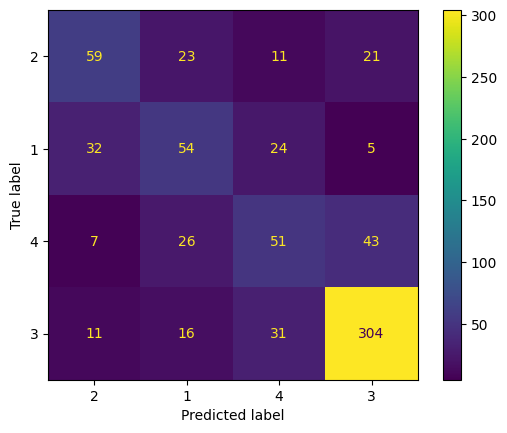

In [ ]:
cm1ent = confusion_matrix(y_test, y_pred)
print(cm1ent)

cn = y.unique()

disp = ConfusionMatrixDisplay.from_estimator(clf_entropy, X_test, y_test, display_labels=cn)

### **Findings: (Information Gain - Entropy)**

**True Positives (TP):**  
Instances correctly classified for each class (values on the diagonal of the confusion matrix).  
- Class 1: 59  
- Class 2: 54  
- Class 3: 51  
- Class 4: 304  

**False Positives (FP):**  
Instances incorrectly classified as a class but actually belong to another class (column-wise, excluding diagonal).  
- Class 1: 32 + 7 + 11 = 50  
- Class 2: 23 + 26 + 16 = 65  
- Class 3: 11 + 24 + 31 = 66  
- Class 4: 21 + 5 + 43 = 69  

**False Negatives (FN):**  
Instances that belong to a class but were classified as another one (row-wise, excluding diagonal).  
- Class 1: 23 + 11 + 21 = 55  
- Class 2: 32 + 24 + 5 = 61  
- Class 3: 7 + 26 + 43 = 76  
- Class 4: 11 + 16 + 31 = 58  

**True Negatives (TN):**  
Instances correctly identified as not belonging to the class.  
- Class 1: 718 - (59 + 50 + 55) = 554  
- Class 2: 718 - (54 + 65 + 61) = 538  
- Class 3: 718 - (51 + 66 + 76) = 525  
- Class 4: 718 - (304 + 69 + 58) = 287

### **Overall Classifier Performance:**

- The confusion matrix shows that most correct predictions are concentrated along the diagonal, indicating that the model is performing reasonably well after refining the class distribution.
- However, there are noticeable misclassifications in Class 2 and Class 3, suggesting that the model has difficulty distinguishing between these two categories.
- The relatively high True Negative (TN) values across classes indicate that the classifier is effective at identifying instances that do not belong to a specific class.
- Despite these strengths, the elevated False Positive (FP) and False Negative (FN) counts highlight areas for improvement, which could potentially be addressed through hyperparameter tuning or experimenting with more advanced classification models.

In [ ]:


# Confusion matrix
cm = np.array([[ 59 , 23 , 11 , 21],
 [ 32, 54 , 24 ,  5],
 [  7 , 26 , 51 , 43],
 [ 11 , 16 , 31, 304]])

num_classes = cm.shape[0]  # Number of classes

for i in range(num_classes):
    TP = cm[i, i]  # True Positives
    FN = np.sum(cm[i, :]) - TP  # False Negatives
    FP = np.sum(cm[:, i]) - TP  # False Positives
    TN = np.sum(cm) - (TP + FN + FP)  # True Negatives

    # Sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Specificity
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    # Precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    print(f"Grade Class {1+i}:")
    print(f"  Sensitivity: {sensitivity:.4f}")
    print(f"  Specificity: {specificity:.4f}")
    print(f"  Precision: {precision:.4f}")
    print("-" * 40)

Grade Class 1:
  Sensitivity: 0.5175
  Specificity: 0.9172
  Precision: 0.5413
----------------------------------------
Grade Class 2:
  Sensitivity: 0.4696
  Specificity: 0.8922
  Precision: 0.4538
----------------------------------------
Grade Class 3:
  Sensitivity: 0.4016
  Specificity: 0.8883
  Precision: 0.4359
----------------------------------------
Grade Class 4:
  Sensitivity: 0.8398
  Specificity: 0.8062
  Precision: 0.8150
----------------------------------------


####Findings


---

#### **Grade Class 1**
- **Sensitivity:** 51.75% — Moderate. The model correctly identifies about half of the students in this class, indicating room for improvement.  
- **Specificity:** 91.72% — High. Most students not in this category are correctly excluded.  
- **Precision:** 54.13% — Slightly above sensitivity, suggesting some false positives but fair accuracy.

---

#### **Grade Class 2**
- **Sensitivity:** 46.96% — Low to moderate. The model has limited success in detecting students in this group.  
- **Specificity:** 89.22% — High. Non-Class 2 students are mostly identified correctly.  
- **Precision:** 45.38% — Close to sensitivity, indicating a modest rate of false positives.

---

#### **Grade Class 3**
- **Sensitivity:** 40.16% — Low. The model struggles to detect students in this category.  
- **Specificity:** 88.83% — High. The model reliably excludes non-Class 3 students.  
- **Precision:** 43.59% — Slightly better than sensitivity, showing some improvement in prediction precision.

---

#### **Grade Class 4**
- **Sensitivity:** 83.98% — Very high. The model performs best in identifying students in this top category.  
- **Specificity:** 80.62% — Slightly lower than other categories but still strong.  
- **Precision:** 81.50% — Balanced with sensitivity, making this the best-performing category.

---


##- Visualizing and Saving Decision Trees:

In [ ]:
# Ensure class_names is a list of strings
cm1ent = [str(name) for name in cm1ent]
fig, ax = plt.subplots(figsize=(25, 25), dpi=400)

tree.plot_tree(cm1ent,
               feature_names=fn,
               class_names=cm1ent,
               filled=True)

plt.title("Decision Tree Classifier with Splitting Data into 70% for training and 30% Testing (Information Gain)", fontsize=14, loc='center')
plt.show()
fig.savefig('Gini3070DT.png')

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got ['[59 23 11 21]', '[32 54 24  5]', '[ 7 26 51 43]', '[ 11  16  31 304]'] instead.

The decision tree begins by analyzing the most influential factor in classifying students, which is Absences. The root node asks the first question: "Are absences less than 0.50?". If the answer is yes, the classification continues based on study time per week (StudyTimeWeekly) and lower absence levels. If the answer is no, meaning the student has a high number of absences, the tree branches further to examine the impact of increasing absences on academic performance.

At the second level of the tree, students with low absences (≤ 0.50) are further classified based on factors such as "Are absences less than 0.22?", followed by an evaluation of weekly study hours. For students with high absences (> 0.50), there is a stronger focus on the impact of excessive absences, classifying them into different levels, such as "Are absences between 0.50 and 0.64?" or "Are absences greater than 0.64?", to assess how these levels affect academic performance.

Beyond absences and study hours, other less influential factors also contribute to student classification, including parental support, tutoring, extracurricular activities, ethnicity, parental education, sports, age, gender, music, and volunteering.consistently represent the predicted class for each subset, offering insight into how various features influence the classification.

From this analysis, we conclude that absences are the most influential factor affecting student performance, as students who miss more classes are more likely to have lower grades. After absences, weekly study time is the next most significant factor in classification. Other factors, such as parental support and tutoring, also contribute to improving academic performance. While extracurricular activities, ethnicity, and parental education have a limited impact, gender, music, and volunteering had no noticeable effect.

##Saving the model:

In [ ]:
clf1ginifile= 'decisionTreeModel3070Entropy.sav'
pickle.dump(clf1gini, open(clf1ginifile, 'wb'))

##Using model for new predictions:

---



In [ ]:
# load model from the file
loaded_model = pickle.load(open(clf1ginifile, 'rb'))
result = loaded_model.predict(X_test)
print(result)

# Generate new data (you can also use the previously generated 'new_values')
# Sample new data
new_values = pd.DataFrame({
    'Age': [1, 2, 0, 1, 1],
    'Gender': [1, 0, 0, 1, 1],
    'Ethnicity': [3, 1, 3, 2, 0],
    'ParentalEducation': [2, 1, 3, 1, 4],
     'StudyTimeWeekly': [0.993344216, 0.834218646, 0.681329678, 0.951329765, 0.411564325],
    'Absences': [0.87154376, 0.51296854, 0.83178954, 0, 0.33145632],
    'Tutoring': [1, 0, 1, 0, 1],
    'ParentalSupport': [2, 1, 0, 3, 4],
    'Extracurricular': [1, 1, 0, 1, 1],
    'Sports': [0, 0, 1, 1, 1],
    'Music':[0,1,0,0,1],
    'Volunteering':[1,0,1,1,0]

})


# Make predictions with the model
predictions = loaded_model.predict(new_values)
print("Predictions for the new test dataset:", predictions)

[3 4 4 3 1 4 4 3 1 4 2 1 2 2 4 3 2 4 4 4 2 3 3 3 4 4 4 4 1 4 1 4 2 2 2 4 4
 1 4 3 4 4 3 4 4 3 4 4 4 4 3 1 4 4 4 1 4 4 4 4 2 2 2 4 4 3 4 4 3 4 4 3 4 1
 2 4 4 4 3 1 4 3 3 1 4 4 2 1 2 1 4 1 4 2 1 4 4 4 4 2 2 4 3 4 4 2 4 1 4 4 4
 3 2 4 4 4 2 3 1 4 4 1 3 4 2 4 3 4 4 4 3 1 4 4 4 2 2 4 4 4 4 4 4 3 1 4 4 4
 4 3 2 4 2 2 4 1 4 4 2 4 3 2 2 4 4 4 3 4 4 4 1 1 4 4 4 4 4 2 2 2 4 1 4 4 4
 4 4 2 4 4 4 3 3 4 2 4 4 3 1 4 1 4 1 3 4 1 3 4 3 1 2 4 3 4 2 4 2 4 1 2 2 4
 4 2 4 4 2 1 4 1 3 1 4 3 1 1 3 4 2 2 2 2 4 4 1 4 4 4 4 4 4 2 2 1 4 4 4 3 4
 4 4 4 4 3 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 2 1 4 4 3 4 4 3 4 3 4 4 4 1 4 4 4
 4 4 4 3 1 4 4 2 4 1 1 2 4 1 4 4 2 4 4 1 4 4 4 2 2 4 4 4 4 4 1 3 4 4 4 4 1
 3 4 4 2 3 4 4 3 4 4 4 1 4 4 4 4 4 2 4 2 4 4 2 1 4 1 2 4 4 4 1 4 1 4 4 4 3
 4 4 4 2 4 4 1 4 4 4 4 1 4 4 3 3 4 1 2 1 4 1 2 4 4 2 1 2 4 1 1 4 2 4 4 4 4
 4 1 3 1 1 4 2 2 4 4 1 2 2 4 4 2 3 3 2 4 4 4 2 2 4 1 1 3 4 3 4 4 2 4 2 4 1
 4 4 4 3 1 4 4 4 4 4 4 4 1 4 4 4 2 4 1 4 3 4 4 4 4 4 4 4 1 2 4 2 3 4 4 3 3
 4 4 4 4 3 1 4 4 4 4 1 4 

  


 This suggests that most predicted students fall into either the high-performance category (Grade 4) or the low-performance category (Grade 1), with no students classified in the middle grades (2 or 3). This may indicate a tendency for the model to favor extreme classifications, which could impact its accuracy in future predictions.



---
# - Gini Index:

##- Model Training and Testing:

In [ ]:
# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# createdecision tree classifier object
clf1gini = DecisionTreeClassifier(criterion='gini',max_depth=6, random_state=1)

#Train decision tree classifier
clf1gini= clf1gini.fit(X_train, y_train)

# Make predictions
y_pred = clf1gini.predict(X_test)

# Compute Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) )

Accuracy: 0.6977715877437326


## - Model Evaluation:
### Confusion Matrix:


[[ 75  13   6  20]
 [ 40  52  19   4]
 [  2  43  41  41]
 [  3   6  20 333]]


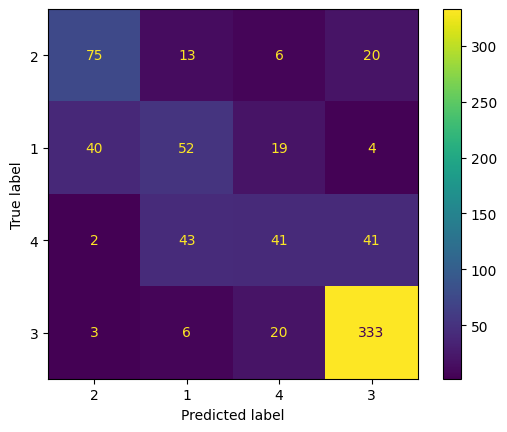

In [ ]:
cm1gini = confusion_matrix(y_test, y_pred)
print(cm1gini)

cn=df['GradeClass'].unique() #classes_names

disp = ConfusionMatrixDisplay.from_estimator(clf1gini, X_test, y_test, display_labels=cn)

###Findings:

* True Positives (TP): True Positives are the correctly classified instances for each class (values along the diagonal of the confusion matrix).

Class 1: 52

Class 2: 75

Class 3: 333

Class 4: 41

* False Positives (FP): False Positives occur when instances are incorrectly classified as a particular class but actually belong to another class. Calculated by summing all values in the predicted column for a class (excluding TP).

Class 1: 13 + 43 + 6 = 62

Class 2: 40 + 2 + 3 = 45

Class 3: 20 + 4 + 41 = 65

Class 4: 6 + 19 + 20 = 45

* False Negatives (FN): False Negatives occur when instances belong to a particular class but are misclassified into another class.
Calculated by summing all values in the true row for a class (excluding TP).

Class 1: 40 + 19 + 4 = 63

Class 2: 13 + 6 + 20 = 39

Class 3: 3 + 6 + 20 = 29

Class 4: 43 + 2 + 41 = 86

* True Negatives (TN): True Negatives are instances correctly classified as not belonging to a particular class.
Calculated as Total Instances - (TP + FP + FN).

Class 1: 718 - (52 + 62 + 63) = 541

Class 2: 718 - (75 + 45 + 39) = 559

Class 3: 718 - (333 + 65 + 29) = 291

Class 4: 718 - (41 + 45 + 86) = 546

*This classifier shows good accuracy as most predictions align along the diagonal (TP), indicating correct classifications. However, some misclassifications exist, particularly in Class 4, which has a high FN rate.*

In [ ]:
import numpy as np

# Confusion matrix from the image
cm = np.array([
  [ 75 , 13  , 6 , 20],
 [ 40 , 52 , 19 ,  4],
 [  2 , 43 , 41 , 41],
 [  3 ,  6 , 20 ,333]
])

num_classes = cm.shape[0]  # Number of classes

for i in range(num_classes):
    TP = cm[i, i]  # True Positives
    FN = np.sum(cm[i, :]) - TP  # False Negatives
    FP = np.sum(cm[:, i]) - TP  # False Positives
    TN = np.sum(cm) - (TP + FN + FP)  # True Negatives

    # Sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Specificity
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    # Precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    print(f"Grade Class {1+i}:")
    print(f"  Sensitivity: {sensitivity:.4f}")
    print(f"  Specificity: {specificity:.4f}")
    print(f"  Precision: {precision:.4f}")
    print("-" * 40)


Grade Class 1:
  Sensitivity: 0.6579
  Specificity: 0.9255
  Precision: 0.6250
----------------------------------------
Grade Class 2:
  Sensitivity: 0.4522
  Specificity: 0.8972
  Precision: 0.4561
----------------------------------------
Grade Class 3:
  Sensitivity: 0.3228
  Specificity: 0.9239
  Precision: 0.4767
----------------------------------------
Grade Class 4:
  Sensitivity: 0.9199
  Specificity: 0.8174
  Precision: 0.8367
----------------------------------------


###Findings: (Student Performance Classification)  

The following analysis evaluates how well the model classifies students into different performance categories (Grade Classes 1-4).  

##### Grade Class 1:  
- Sensitivity: 65.79% (moderate, indicating the model correctly identifies students in this category with decent accuracy).  
- Specificity: 92.55% (high, meaning students not in this category are well distinguished).  
- Precision: 62.50% (slightly lower than sensitivity, suggesting some misclassification).  

##### Grade Class 2:  
- Sensitivity: 45.22% (relatively low, meaning the model struggles to detect students in this category).  
- Specificity: 89.72% (high, indicating students outside this category are well classified).  
- Precision: 45.61% (similar to sensitivity, showing moderate accuracy).  

##### Grade Class 3:  
- Sensitivity: 32.28% (low, suggesting the model has difficulty detecting students in this group).  
- Specificity: 92.39% (high, meaning students outside this category are correctly classified).  
- Precision: 47.67% (better than sensitivity, meaning fewer false positives).  

##### Grade Class 4:
- Sensitivity: 91.99% (very high, indicating strong performance in identifying top-performing students).  
- Specificity: 81.74% (slightly lower than other classes but still effective).  
- Precision: 83.67% (well-balanced with sensitivity, making this the best-classified group).  


*Overall Observations:*   
- *Grade Class 4 (Top Performers) has the best classification accuracy, meaning the model is highly effective at recognizing high-scoring students.*  
- *Grade Class 3 has the lowest Sensitivity, suggesting the model struggles to identify students in this category.*  
- *Specificity remains high across all categories, meaning the model is good at recognizing students who do not belong to a certain group.*  
- *The trade-off between Sensitivity and Precision suggests that the model may favor avoiding misclassification over correctly identifying all struggling students.*

##- Visualizing and Saving Decision Trees:

In [ ]:
# Ensure class_names is a list of strings
cm1gini = [str(name) for name in cm1gini]
fig, ax = plt.subplots(figsize=(25, 25), dpi=400)

tree.plot_tree(clf1gini,
               feature_names=fn,
               class_names=cm1gini,
               filled=True)

plt.title("Decision Tree Classifier with Splitting Data into 70% for training and 30% Testing (Gini Index)", fontsize=14, loc='center')
plt.show()
fig.savefig('Gini3070DT.png')

The decision tree begins by analyzing the most influential factor in classifying students, which is Absences. The root node asks the first question: "Are absences less than 0.50?". If the answer is yes, the classification continues based on study time per week (StudyTimeWeekly) and lower absence levels. If the answer is no, meaning the student has a high number of absences, the tree branches further to examine the impact of increasing absences on academic performance.

At the second level of the tree, students with low absences (≤ 0.50) are further classified based on factors such as "Are absences less than 0.22?", followed by an evaluation of weekly study hours. For students with high absences (> 0.50), there is a stronger focus on the impact of excessive absences, classifying them into different levels, such as "Are absences between 0.50 and 0.64?" or "Are absences greater than 0.64?", to assess how these levels affect academic performance.

Beyond absences and study hours, other less influential factors also contribute to student classification, including parental support, tutoring, extracurricular activities, ethnicity, parental education, sports, age, gender, music, and volunteering.consistently represent the predicted class for each subset, offering insight into how various features influence the classification.

From this analysis, we conclude that absences are the most influential factor affecting student performance, as students who miss more classes are more likely to have lower grades. After absences, weekly study time is the next most significant factor in classification. Other factors, such as parental support and tutoring, also contribute to improving academic performance. While extracurricular activities, ethnicity, and parental education have a limited impact, gender, music, and volunteering had no noticeable effect.

##Saving the model:

In [ ]:
clf1ginifile= 'decisionTreeModel3070Entropy.sav'
pickle.dump(clf1gini, open(clf1ginifile, 'wb'))

##Using model for new predictions:

In [ ]:
# load model from the file
loaded_model = pickle.load(open(clf1ginifile, 'rb'))
result = loaded_model.predict(X_test)
print(result)

# Generate new data (you can also use the previously generated 'new_values')
# Sample new data
new_values = pd.DataFrame({
    'Age': [1, 2, 0, 1, 1],
    'Gender': [1, 0, 0, 1, 1],
    'Ethnicity': [3, 1, 3, 2, 0],
    'ParentalEducation': [2, 1, 3, 1, 4],
     'StudyTimeWeekly': [0.993344216, 0.834218646, 0.681329678, 0.951329765, 0.411564325],
    'Absences': [0.87154376, 0.51296854, 0.83178954, 0, 0.33145632],
    'Tutoring': [1, 0, 1, 0, 1],
    'ParentalSupport': [2, 1, 0, 3, 4],
    'Extracurricular': [1, 1, 0, 1, 1],
    'Sports': [0, 0, 1, 1, 1],
    'Music':[0,1,0,0,1],
    'Volunteering':[1,0,1,1,0]

})


# Make predictions with the model
predictions = loaded_model.predict(new_values)
print("Predictions for the new test dataset:", predictions)

[3 4 4 3 1 4 4 3 1 4 2 1 2 2 4 3 2 4 4 4 2 3 3 3 4 4 4 4 1 4 1 4 2 2 2 4 4
 1 4 3 4 4 3 4 4 3 4 4 4 4 3 1 4 4 4 1 4 4 4 4 2 2 2 4 4 3 4 4 3 4 4 3 4 1
 2 4 4 4 3 1 4 3 3 1 4 4 2 1 2 1 4 1 4 2 1 4 4 4 4 2 2 4 3 4 4 2 4 1 4 4 4
 3 2 4 4 4 2 3 1 4 4 1 3 4 2 4 3 4 4 4 3 1 4 4 4 2 2 4 4 4 4 4 4 3 1 4 4 4
 4 3 2 4 2 2 4 1 4 4 2 4 3 2 2 4 4 4 3 4 4 4 1 1 4 4 4 4 4 2 2 2 4 1 4 4 4
 4 4 2 4 4 4 3 3 4 2 4 4 3 1 4 1 4 1 3 4 1 3 4 3 1 2 4 3 4 2 4 2 4 1 2 2 4
 4 2 4 4 2 1 4 1 3 1 4 3 1 1 3 4 2 2 2 2 4 4 1 4 4 4 4 4 4 2 2 1 4 4 4 3 4
 4 4 4 4 3 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 2 1 4 4 3 4 4 3 4 3 4 4 4 1 4 4 4
 4 4 4 3 1 4 4 2 4 1 1 2 4 1 4 4 2 4 4 1 4 4 4 2 2 4 4 4 4 4 1 3 4 4 4 4 1
 3 4 4 2 3 4 4 3 4 4 4 1 4 4 4 4 4 2 4 2 4 4 2 1 4 1 2 4 4 4 1 4 1 4 4 4 3
 4 4 4 2 4 4 1 4 4 4 4 1 4 4 3 3 4 1 2 1 4 1 2 4 4 2 1 2 4 1 1 4 2 4 4 4 4
 4 1 3 1 1 4 2 2 4 4 1 2 2 4 4 2 3 3 2 4 4 4 2 2 4 1 1 3 4 3 4 4 2 4 2 4 1
 4 4 4 3 1 4 4 4 4 4 4 4 1 4 4 4 2 4 1 4 3 4 4 4 4 4 4 4 1 2 4 2 3 4 4 3 3
 4 4 4 4 3 1 4 4 4 4 1 4 

  


 This suggests that most predicted students fall into either the high-performance category (Grade 4) or the low-performance category (Grade 1), with no students classified in the middle grades (2 or 3). This may indicate a tendency for the model to favor extreme classifications, which could impact its accuracy in future predictions.



#Splitting data into 80% for Training and 20% for Testing:


- Information Gain (Entropy):

In [ ]:
# Splitting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create decision tree classifier object using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Train decision tree classifier
clf_entropy.fit(X_train, y_train)

# Make predictions
y_pred = clf_entropy.predict(X_test)

# Compute Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6659707724425887


**Model Evaluation:**



*  Confusion Matrix:




[[ 30  18   5  14]
 [ 20  40  12   5]
 [  8  23  37  19]
 [  8  10  18 212]]


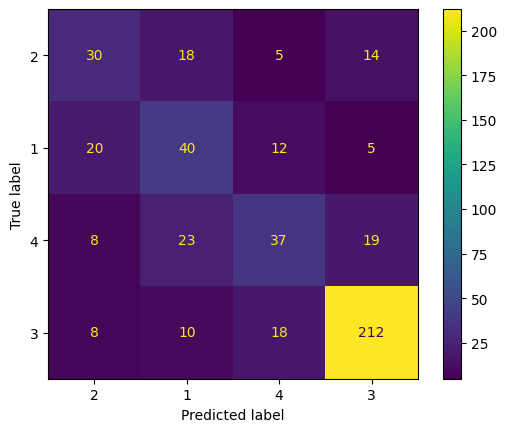

In [ ]:
cm2ent = confusion_matrix(y_test, y_pred)
print(cm2ent)

cn = y.unique()

disp = ConfusionMatrixDisplay.from_estimator(clf_entropy, X_test, y_test, display_labels=cn)

### **Findings: (Information Gain - Entropy)**

**True Positives (TP):**  
Instances correctly classified for each class (values on the diagonal of the confusion matrix).  
- Class 1: 30  
- Class 2: 40  
- Class 3: 37  
- Class 4: 212  

**False Positives (FP):**  
Instances incorrectly classified as a class but actually belong to another class (column-wise, excluding diagonal).  
- Class 1: 20 + 8 + 8 = 36  
- Class 2: 18 + 23 + 10 = 51  
- Class 3: 5 + 12 + 18 = 35  
- Class 4: 14 + 5 + 19 = 38  

**False Negatives (FN):**  
Instances that belong to a class but were classified as another one (row-wise, excluding diagonal).  
- Class 1: 18 + 5 + 14 = 37  
- Class 2: 20 + 12 + 5 = 37  
- Class 3: 8 + 23 + 19 = 50  
- Class 4: 8 + 10 + 18 = 36  

**True Negatives (TN):**  
Instances correctly identified as not belonging to the class.  
- Class 1: 479 - (30 + 36 + 37) = 376  
- Class 2: 479 - (40 + 51 + 37) = 351  
- Class 3: 479 - (37 + 35 + 50) = 357  
- Class 4: 479 - (212 + 38 + 36) = 193





### **Overall Classifier Performance:**

- The classifier performs well in Class 4, showing a high number of true positives (212), indicating strong detection of top-performing students.
- Misclassifications are more frequent in Class 2 and Class 3, reflecting confusion between these classes due to higher false positives and false negatives.
- True negatives are generally high, meaning the model avoids many incorrect classifications across most classes.
- Despite the strengths, there is still room for improvement by tuning hyperparameters, exploring more advanced models like Random Forests, or refining feature selection to boost classification accuracy.


In [ ]:
# Confusion matrix
cm = np.array([[ 30,  18 ,  5 , 14],
 [ 20 , 40 , 12  , 5],
 [  8 , 23 , 37 , 19],
 [  8 , 10 , 18 ,212]])

num_classes = cm.shape[0]  # Number of classes

for i in range(num_classes):
    TP = cm[i, i]  # True Positives
    FN = np.sum(cm[i, :]) - TP  # False Negatives
    FP = np.sum(cm[:, i]) - TP  # False Positives
    TN = np.sum(cm) - (TP + FN + FP)  # True Negatives

    # Sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Specificity
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    # Precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    print(f"Grade Class {1+i}:")
    print(f"  Sensitivity: {sensitivity:.4f}")
    print(f"  Specificity: {specificity:.4f}")
    print(f"  Precision: {precision:.4f}")
    print("-" * 40)

Grade Class 1:
  Sensitivity: 0.4478
  Specificity: 0.9126
  Precision: 0.4545
----------------------------------------
Grade Class 2:
  Sensitivity: 0.5195
  Specificity: 0.8731
  Precision: 0.4396
----------------------------------------
Grade Class 3:
  Sensitivity: 0.4253
  Specificity: 0.9107
  Precision: 0.5139
----------------------------------------
Grade Class 4:
  Sensitivity: 0.8548
  Specificity: 0.8355
  Precision: 0.8480
----------------------------------------


###  Findings:

---

#### **Grade Class 1**
- **Sensitivity:** 44.78% — Low. The model struggles to correctly identify students in this group, capturing less than half.  
- **Specificity:** 91.26% — High. It reliably excludes students not belonging to this class.  
- **Precision:** 45.45% — Closely aligned with sensitivity, suggesting a consistent but limited prediction accuracy.

---

#### **Grade Class 2**
- **Sensitivity:** 51.95% — Moderate. The model performs slightly better in detecting students in this class than in Class 1.  
- **Specificity:** 87.31% — High. Students outside this group are still mostly identified correctly.  
- **Precision:** 43.96% — Lower than sensitivity, indicating a higher rate of false positives.

---

#### **Grade Class 3**
- **Sensitivity:** 42.53% — Low. Detection of students in this category is still challenging for the model.  
- **Specificity:** 91.07% — Very high. Non-Class 3 students are well identified.  
- **Precision:** 51.39% — Noticeably better than sensitivity, meaning that while it misses some students, those it identifies are more likely to be correct.

---

#### **Grade Class 4**
- **Sensitivity:** 85.48% — Very high. The model continues to perform best at identifying students in this top-performing group.  
- **Specificity:** 83.55% — Strong, though slightly lower than other categories.  
- **Precision:** 84.80% — Well-aligned with sensitivity, indicating reliable and accurate predictions in this class.


##- Visualizing and Saving Decision Trees:

In [ ]:
# Ensure class_names is a list of strings
cm2ent = [str(name) for name in cm2ent]  # Convert class names to strings

fig, ax = plt.subplots(figsize=(25, 25), dpi=400)

tree.plot_tree(cm2ent,
               feature_names=fn,
               class_names=cm2ent,
               filled=True)

plt.title("Decision Tree Classifier with Splitting Data into 80% for training and 20% Testing (Information Gain)", fontsize=14,  loc='center')
plt.show()
fig.savefig('Gain2080DT.png')

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got ['[30 18  5 14]', '[20 40 12  5]', '[ 8 23 37 19]', '[  8  10  18 212]'] instead.

The root node of the decision tree is Absences, making it the most influential factor in classifying students. It starts with the question: "Are absences less than 0.50?". If the answer is yes, further splits occur, such as "Are absences less than 0.22?", followed by an evaluation of Tutoring. If the answer is no, meaning the student has a high number of absences, the impact of increased absences becomes more significant, and the tree checks StudyTimeWeekly to determine whether studying more can help improve performance. For students with high absences, they are classified into different groups based on their absence levels, such as "Are absences between 0.50 and 0.64?", before considering study time as a supporting factor.

Besides absences and StudyTimeWeekly, Tutoring appeared as a supporting factor but was not as strong as the primary factors. Sports participation had a minor effect, while Parental Support and Ethnicity had even less impact. On the other hand, factors like Age, Gender, Parental Education, Extracurricular Activities, Music, and Volunteering had no impact on student classification in the decision tree.

Based on the decision tree analysis, we conclude that reducing absences is the most important factor in improving student performance, as students who attend classes regularly have a higher chance of achieving good grades. Additionally, consistent weekly studying plays a crucial role in academic improvement, especially for students with high absences. While tutoring and sports may provide some benefits, their overall impact is limited compared to absences and self-study. Finally, some factors like gender, extracurricular activities, and music had no significant effect on student performance.

##Saving the model:

In [ ]:
clf2ginifile= 'decisionTreeModel2080gini.sav'
pickle.dump(clf2gini, open(clf2ginifile, 'wb'))

##Using model for new predictions:

In [ ]:
# load model from the file
loaded_model = pickle.load(open(clf2ginifile, 'rb'))
result = loaded_model.predict(X_test)
print(result)

# Generate new data (you can also use the previously generated 'new_values')
# Sample new data
new_values = pd.DataFrame({
   'Age': [1, 2, 0, 1, 1],
    'Gender': [1, 0, 0, 1, 1],
    'Ethnicity': [3, 1, 3, 2, 0],
    'ParentalEducation': [2, 1, 3, 1, 4],
     'StudyTimeWeekly': [0.993344216, 0.834218646, 0.681329678, 0.951329765, 0.411564325],
    'Absences': [0.87154376, 0.51296854, 0.83178954, 0, 0.33145632],
    'Tutoring': [1, 0, 1, 0, 1],
    'ParentalSupport': [2, 1, 0, 3, 4],
    'Extracurricular': [1, 1, 0, 1, 1],
    'Sports': [0, 0, 1, 1, 1],
    'Music':[0,1,0,0,1],
    'Volunteering':[1,0,1,1,0]
})


# Make predictions with the model
predictions = loaded_model.predict(new_values)
print("Predictions for the new test dataset:", predictions)

[2 4 4 4 2 4 4 3 1 4 4 2 2 2 4 4 2 4 3 4 1 3 4 4 4 4 4 4 1 4 2 4 1 3 2 4 3
 1 4 4 4 4 3 4 4 3 4 4 4 4 3 1 4 4 4 1 4 4 4 4 3 2 3 4 4 4 4 4 3 4 4 3 4 2
 3 3 4 4 3 2 4 3 2 1 3 4 3 1 1 1 4 2 4 1 2 4 4 4 4 3 2 4 4 4 4 2 4 1 4 4 4
 2 3 4 4 4 2 4 4 4 4 1 3 4 2 4 3 4 4 4 4 1 4 4 4 2 2 4 4 4 4 4 4 3 2 4 4 4
 4 3 2 4 3 3 3 1 4 4 3 4 4 1 2 4 4 4 4 4 4 4 2 4 4 4 4 4 4 3 3 3 4 2 4 4 4
 4 4 2 4 4 4 2 4 4 2 4 4 4 1 4 2 4 1 3 4 1 3 4 4 1 2 4 3 4 3 4 3 4 2 2 1 4
 4 3 4 4 2 2 4 2 4 1 4 3 2 2 3 4 3 3 1 3 4 4 2 4 4 4 4 4 4 4 2 1 3 4 4 4 4
 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 3 4 4 3 4 4 4 4 4 2 3 4 3
 4 4 4 2 1 4 4 2 4 2 1 3 4 1 4 4 3 4 4 2 4 4 4 3 2 4 4 4 4 4 1 4 4 4 4 4 2
 4 4 3 2 4 4 4 2 4 4 4 2 3 4 4 4 4 2 4 2 4 4 3 2 4 1 4 4 4 4 2 4 1 4 4 4 4
 4 4 4 2 4 4 2 4 4 4 4 1 4 4 3 2 4 1 2 2 4 2 1 4 4 3 1 2 4 1 2 4 3 4 4 4 4
 4 1 3 1 2 4 2 3 4 4 2 1 2 4 4 3 3 3 2 4 4 4 3 2 4 2 1 4 4 3 4 4 2 4 3 4 1
 4 4 4 3 2 4 4 4 4 4 4 4 2 4 4 4 1 3 2 4 4 4 4 4 4 4 4 4 2 2 4 4 4 4 4]
Predictions for the new test

The model tends to classify students into the highest and lowest categories, with three students predicted as high performers (Grade 4) and one as a low performer (Grade 1). Only one student was classified into the middle range (Grade 3), which aligns with the observed model behavior of favoring extreme classifications.

While the Grade 4 predictions are likely the most accurate, the Grade 3 and Grade 1 classifications may require further validation due to lower sensitivity.

---
# - Gini Index:

##- Model Training and Testing:

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the Decision Tree Classifier with Gini index
clf2gini = DecisionTreeClassifier(criterion="gini",max_depth=4, random_state=1)
clf2gini = clf2gini.fit(X_train, y_train)

# Make predictions
y_pred = clf2gini.predict(X_test)

# Compute Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6931106471816284


## - Model Evaluation:
### Confusion Matrix:

[[ 29  23   5  10]
 [ 13  37  18   9]
 [  0  16  31  40]
 [  0   1  12 235]]


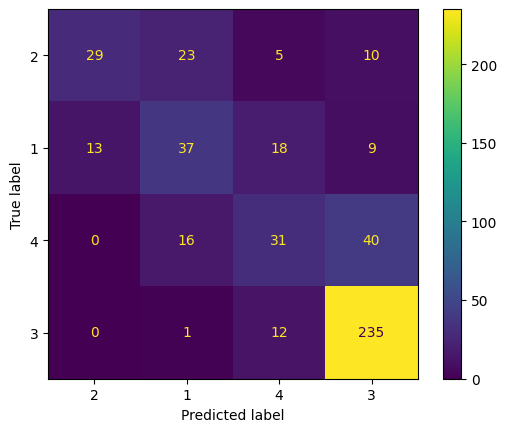

In [ ]:
cm2gini = confusion_matrix(y_test, y_pred)
print(cm2gini)

cn=df['GradeClass'].unique() #classes_names

disp = ConfusionMatrixDisplay.from_estimator(clf2gini, X_test, y_test, display_labels=cn)

###Findings:
* True Positives (TP): Correctly classified instances for each class (diagonal values):

Class 1: 37

Class 2: 29

Class 3: 235

Class 4: 31

* False Positives (FP): Instances incorrectly classified as a particular class:

Class 1: 23 + 16 + 1 = 40

Class 2: 13 + 0 + 0 = 13

Class 3: 10 + 9 + 40 = 59

Class 4: 5 + 18 + 12 = 35

* False Negatives (FN): Instances that belong to a class but were misclassified:

Class 1: 13 + 18 + 9 = 40

Class 2: 23 + 5 + 10 = 38

Class 3: 0 + 1 + 12 = 13

Class 4: 0 + 16 + 40 = 56

* True Negatives (TN)

Correctly classified as not belonging to a particular class:

Class 1: 479 - (37 + 40 + 40) = 362

Class 2: 479 - (29 + 38 + 13) = 399

Class 3: 479 - (235 + 59 + 13) = 172

Class 4: 479 - (31 + 35 + 56) = 357

*The classifier shows strong performance, especially for Class 3, with a high number of True Positives. However, misclassifications are notable in other classes, particularly Class 4, which has a significant number of False Negatives (56).*

In [ ]:
# Confusion matrix from the image
cm = np.array([
  [ 29 , 23  , 5 , 10],
 [ 13 , 37 , 18  , 9],
 [  0  ,16 , 31 , 40],
 [  0  , 1 , 12, 235]
])

num_classes = cm.shape[0]  # Number of classes

for i in range(num_classes):
    TP = cm[i, i]  # True Positives
    FN = np.sum(cm[i, :]) - TP  # False Negatives
    FP = np.sum(cm[:, i]) - TP  # False Positives
    TN = np.sum(cm) - (TP + FN + FP)  # True Negatives

    # Sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Specificity
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    # Precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    print(f"Grade Class {1+i}:")
    print(f"  Sensitivity: {sensitivity:.4f}")
    print(f"  Specificity: {specificity:.4f}")
    print(f"  Precision: {precision:.4f}")
    print("-" * 40)

Grade Class 1:
  Sensitivity: 0.4328
  Specificity: 0.9684
  Precision: 0.6905
----------------------------------------
Grade Class 2:
  Sensitivity: 0.4805
  Specificity: 0.9005
  Precision: 0.4805
----------------------------------------
Grade Class 3:
  Sensitivity: 0.3563
  Specificity: 0.9107
  Precision: 0.4697
----------------------------------------
Grade Class 4:
  Sensitivity: 0.9476
  Specificity: 0.7446
  Precision: 0.7993
----------------------------------------


###Findings: (Student Performance Classification)  

The following analysis evaluates how well the model classifies students into different performance categories (Classes 1-4) based on their scores.  

##### Grade Class 1:  
- Sensitivity: 43.28% (Moderate, meaning the model identifies students in this category with reasonable accuracy).  
- Specificity: 96.84% (Very high, indicating that students who do not belong to this category are correctly classified).  
- Precision: 69.05% (Better than sensitivity, meaning the classification within this category is fairly accurate).  

##### Grade Class 2:  
- Sensitivity: 48.05% (Better than Class 1 but still moderate).  
- Specificity: 90.05% (High, meaning students outside this category are well distinguished).  
- Precision: 48.05% (Balanced with sensitivity, indicating moderate classification accuracy).  

##### Grade Class 3:  
- Sensitivity: 35.63% (Low, meaning the model struggles to detect students in this category).  
- Specificity: 91.07% (High, indicating that students outside this class are correctly classified).  
- Precision: 46.97% (Better than sensitivity, meaning classification within this class is fairly accurate).  

##### Grade Class 4:  
- Sensitivity: 94.76% (Very high, meaning the model accurately identifies top-performing students).  
- Specificity: 74.46% (Lower than other categories, meaning there might be some misclassifications outside this category).  
- Precision: 79.93% (Well-balanced with sensitivity, making this category the most accurately classified).  



*Overall Observations:*  
- *Class 4 (Top Performers) has the highest classification accuracy, meaning the model is highly effective at identifying high-achieving students.*  
- *Class 3 has the lowest Sensitivity, indicating that the model struggles to correctly identify students in this category.*  
- *Specificity is high across all categories, meaning the model is good at recognizing students who do not belong to a certain category.*  
- *The trade-off between Sensitivity and Precision suggests that the model might favor avoiding misclassifications over ensuring all struggling students are identified correctly.*

##- Visualizing and Saving Decision Trees:

In [ ]:
# Ensure class_names is a list of strings
cm2gini = [str(name) for name in cm2gini]  # Convert class names to strings

fig, ax = plt.subplots(figsize=(25, 25), dpi=400)

tree.plot_tree(clf2gini,
               feature_names=fn,
               class_names=cm2gini,
               filled=True)

plt.title("Decision Tree Classifier with Splitting Data into 80% for training and 20% Testing (Gini Index)", fontsize=14,  loc='center')
plt.show()
fig.savefig('Gini2080DT.png')

The root node of the decision tree is Absences, making it the most influential factor in classifying students. It starts with the question: "Are absences less than 0.50?". If the answer is yes, further splits occur, such as "Are absences less than 0.22?", followed by an evaluation of Tutoring. If the answer is no, meaning the student has a high number of absences, the impact of increased absences becomes more significant, and the tree checks StudyTimeWeekly to determine whether studying more can help improve performance. For students with high absences, they are classified into different groups based on their absence levels, such as "Are absences between 0.50 and 0.64?", before considering study time as a supporting factor.

Besides absences and StudyTimeWeekly, Tutoring appeared as a supporting factor but was not as strong as the primary factors. Sports participation had a minor effect, while Parental Support and Ethnicity had even less impact. On the other hand, factors like Age, Gender, Parental Education, Extracurricular Activities, Music, and Volunteering had no impact on student classification in the decision tree.

Based on the decision tree analysis, we conclude that reducing absences is the most important factor in improving student performance, as students who attend classes regularly have a higher chance of achieving good grades. Additionally, consistent weekly studying plays a crucial role in academic improvement, especially for students with high absences. While tutoring and sports may provide some benefits, their overall impact is limited compared to absences and self-study. Finally, some factors like gender, extracurricular activities, and music had no significant effect on student performance.

##Saving the model:

In [ ]:
clf2ginifile= 'decisionTreeModel2080gini.sav'
pickle.dump(clf2gini, open(clf2ginifile, 'wb'))

##Using model for new predictions:

In [ ]:
# load model from the file
loaded_model = pickle.load(open(clf2ginifile, 'rb'))
result = loaded_model.predict(X_test)
print(result)

# Generate new data (you can also use the previously generated 'new_values')
# Sample new data
new_values = pd.DataFrame({
   'Age': [1, 2, 0, 1, 1],
    'Gender': [1, 0, 0, 1, 1],
    'Ethnicity': [3, 1, 3, 2, 0],
    'ParentalEducation': [2, 1, 3, 1, 4],
     'StudyTimeWeekly': [0.993344216, 0.834218646, 0.681329678, 0.951329765, 0.411564325],
    'Absences': [0.87154376, 0.51296854, 0.83178954, 0, 0.33145632],
    'Tutoring': [1, 0, 1, 0, 1],
    'ParentalSupport': [2, 1, 0, 3, 4],
    'Extracurricular': [1, 1, 0, 1, 1],
    'Sports': [0, 0, 1, 1, 1],
    'Music':[0,1,0,0,1],
    'Volunteering':[1,0,1,1,0]
})


# Make predictions with the model
predictions = loaded_model.predict(new_values)
print("Predictions for the new test dataset:", predictions)

[2 4 4 4 2 4 4 3 1 4 4 2 2 2 4 4 2 4 3 4 1 3 4 4 4 4 4 4 1 4 2 4 1 3 2 4 3
 1 4 4 4 4 3 4 4 3 4 4 4 4 3 1 4 4 4 1 4 4 4 4 3 2 3 4 4 4 4 4 3 4 4 3 4 2
 3 3 4 4 3 2 4 3 2 1 3 4 3 1 1 1 4 2 4 1 2 4 4 4 4 3 2 4 4 4 4 2 4 1 4 4 4
 2 3 4 4 4 2 4 4 4 4 1 3 4 2 4 3 4 4 4 4 1 4 4 4 2 2 4 4 4 4 4 4 3 2 4 4 4
 4 3 2 4 3 3 3 1 4 4 3 4 4 1 2 4 4 4 4 4 4 4 2 4 4 4 4 4 4 3 3 3 4 2 4 4 4
 4 4 2 4 4 4 2 4 4 2 4 4 4 1 4 2 4 1 3 4 1 3 4 4 1 2 4 3 4 3 4 3 4 2 2 1 4
 4 3 4 4 2 2 4 2 4 1 4 3 2 2 3 4 3 3 1 3 4 4 2 4 4 4 4 4 4 4 2 1 3 4 4 4 4
 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 3 4 4 3 4 4 4 4 4 2 3 4 3
 4 4 4 2 1 4 4 2 4 2 1 3 4 1 4 4 3 4 4 2 4 4 4 3 2 4 4 4 4 4 1 4 4 4 4 4 2
 4 4 3 2 4 4 4 2 4 4 4 2 3 4 4 4 4 2 4 2 4 4 3 2 4 1 4 4 4 4 2 4 1 4 4 4 4
 4 4 4 2 4 4 2 4 4 4 4 1 4 4 3 2 4 1 2 2 4 2 1 4 4 3 1 2 4 1 2 4 3 4 4 4 4
 4 1 3 1 2 4 2 3 4 4 2 1 2 4 4 3 3 3 2 4 4 4 3 2 4 2 1 4 4 3 4 4 2 4 3 4 1
 4 4 4 3 2 4 4 4 4 4 4 4 2 4 4 4 1 3 2 4 4 4 4 4 4 4 4 4 2 2 4 4 4 4 4]
Predictions for the new test

The model tends to classify students into the highest and lowest categories, with three students predicted as high performers (Grade 4) and one as a low performer (Grade 1). Only one student was classified into the middle range (Grade 3), which aligns with the observed model behavior of favoring extreme classifications.

While the Grade 4 predictions are likely the most accurate, the Grade 3 and Grade 1 classifications may require further validation due to lower sensitivity.



#Splitting Data into 60% for training and 40% Testing

- Information Gain (Entropy):

In [ ]:
# Splitting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Create decision tree classifier object using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Train decision tree classifier
clf_entropy.fit(X_train, y_train)

# Make predictions
y_pred = clf_entropy.predict(X_test)

# Compute Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6300940438871473


**Model Evaluation:**

* Confusion Matrix:

[[ 71  39  14  29]
 [ 50  60  37  12]
 [  6  42  83  37]
 [ 15  22  51 389]]


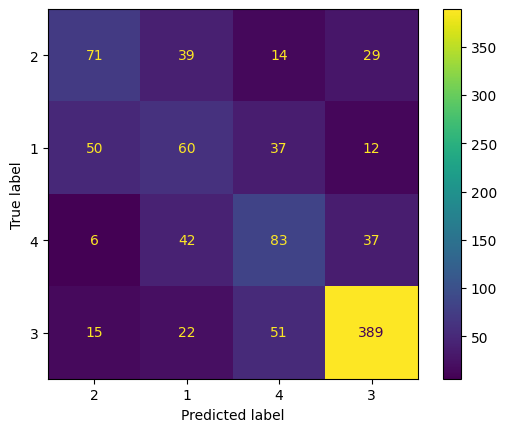

In [ ]:
cm3ent = confusion_matrix(y_test, y_pred)
print(cm3ent)

cn = y.unique()

disp = ConfusionMatrixDisplay.from_estimator(clf_entropy, X_test, y_test, display_labels=cn)

### **Findings: (Information Gain - Entropy)**

**True Positives (TP):**  
Instances correctly classified for each class (values on the diagonal of the confusion matrix).  
- Class 1: 71  
- Class 2: 60  
- Class 3: 83  
- Class 4: 389  

**False Positives (FP):**  
Instances incorrectly classified as a class but actually belong to another class (column-wise, excluding diagonal).  
- Class 1: 50 + 6 + 15 = 71  
- Class 2: 39 + 42 + 22 = 103  
- Class 3: 14 + 37 + 51 = 102  
- Class 4: 29 + 12 + 37 = 78  

**False Negatives (FN):**  
Instances that belong to a class but were classified as another one (row-wise, excluding diagonal).  
- Class 1: 39 + 14 + 29 = 82  
- Class 2: 50 + 37 + 12 = 99  
- Class 3: 6 + 42 + 37 = 85  
- Class 4: 15 + 22 + 51 = 88  

**True Negatives (TN):**  
Instances correctly identified as not belonging to the class.  
- Class 1: 957 - (71 + 71 + 82) = 733  
- Class 2: 957 - (60 + 103 + 99) = 695  
- Class 3: 957 - (83 + 102 + 85) = 687  
- Class 4: 957 - (389 + 78 + 88) = 402


### **Overall Classifier Performance:**

- The model shows strong performance in **Class 4**, achieving a high number of true positives (389), which indicates effective classification of this group.
- There is noticeable confusion between **Class 2 and Class 3**, with relatively high false positives and false negatives, suggesting the model struggles to distinguish between them.
- **Class 1** also shows moderate performance, with balanced TP but still affected by misclassifications from and to other classes.
- True negative values are relatively high across all classes, especially in Class 1 and 2, indicating the model is able to avoid many incorrect classifications.
- Overall, the model performs well, but further improvements can be made by applying hyperparameter tuning, using ensemble methods like Random Forests, or refining feature selection techniques to better separate the overlapping classes.

In [ ]:
# Confusion matrix
cm = np.array([[ 71 , 39 , 14  ,29],
 [ 50 , 60 , 37 , 12],
 [  6 , 42 , 83,  37],
 [ 15 , 22 , 51 ,389]])

num_classes = cm.shape[0]  # Number of classes

for i in range(num_classes):
    TP = cm[i, i]  # True Positives
    FN = np.sum(cm[i, :]) - TP  # False Negatives
    FP = np.sum(cm[:, i]) - TP  # False Positives
    TN = np.sum(cm) - (TP + FN + FP)  # True Negatives

    # Sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Specificity
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    # Precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    print(f"Grade Class {1+i}:")
    print(f"  Sensitivity: {sensitivity:.4f}")
    print(f"  Specificity: {specificity:.4f}")
    print(f"  Precision: {precision:.4f}")
    print("-" * 40)

Grade Class 1:
  Sensitivity: 0.4641
  Specificity: 0.9117
  Precision: 0.5000
----------------------------------------
Grade Class 2:
  Sensitivity: 0.3774
  Specificity: 0.8709
  Precision: 0.3681
----------------------------------------
Grade Class 3:
  Sensitivity: 0.4940
  Specificity: 0.8707
  Precision: 0.4486
----------------------------------------
Grade Class 4:
  Sensitivity: 0.8155
  Specificity: 0.8375
  Precision: 0.8330
----------------------------------------


###  Findings:

---

#### **Grade Class 1**
- **Sensitivity:** 46.41% — Low to moderate. The model captures less than half of the students in this class, showing some difficulty in accurate detection.  
- **Specificity:** 91.17% — High. Most students not in this group are correctly identified.  
- **Precision:** 50.00% — Slightly higher than sensitivity, suggesting moderate reliability in its predictions.

---

#### **Grade Class 2**
- **Sensitivity:** 37.74% — Low. The model struggles to correctly detect students in this group.  
- **Specificity:** 87.09% — High. It performs well in identifying students outside this class.  
- **Precision:** 36.81% — Very close to sensitivity, indicating both high false negatives and some false positives.

---

#### **Grade Class 3**
- **Sensitivity:** 49.40% — Moderate. This shows some improvement, with the model identifying nearly half of the students in this category.  
- **Specificity:** 87.07% — High. Non-Class 3 students are mostly excluded correctly.  
- **Precision:** 44.86% — Slightly below sensitivity, reflecting balanced but still limited accuracy.

---

#### **Grade Class 4**
- **Sensitivity:** 81.55% — Very high. The model continues to excel in identifying top-performing students.  
- **Specificity:** 83.75% — Solid. Slightly lower than previous iterations, but still strong.  
- **Precision:** 83.30% — Well-aligned with sensitivity, confirming strong and consistent performance in this class.


##- Visualizing and Saving Decision Trees:

In [ ]:
# Ensure class_names is a list of strings
cm3gini = [str(name) for name in cm3gini]  # Convert class names to strings

fig, ax = plt.subplots(figsize=(40, 30), dpi=400)

tree.plot_tree(clf3gini,
               feature_names=fn,
               class_names=cm3gini,
               filled=True)

plt.title("Decision Tree Classifier with Splitting Data into 60% for training and 40% Testing (Gini Index)", fontsize=14,  loc='center')
plt.show()
fig.savefig('Gini4060DT.png')

NameError: name 'cm3gini' is not defined

The most influential factor in classifying students was Absences, making it the root node of the tree. The tree starts with the question: "Are absences less than 0.50?".

If the answer is yes, students are further split based on their absence levels, first checking if absences are less than 0.22, followed by evaluating Parental Support and StudyTimeWeekly.

If the answer is no, meaning the student has a high number of absences, they are classified into different categories based on their absence levels, such as "Are absences between 0.50 and 0.64?", and then evaluated based on weekly study time to assess its impact on academic performance.

Besides absences, StudyTimeWeekly was the second most important factor, followed by Parental Support and Tutoring. Less influential factors included Extracurricular Activities and Sports, while Parental Education and Volunteering had only a minor impact. Age had a very small influence but was not completely irrelevant, meaning it appeared in the tree but played a minor role compared to other factors. On the other hand, Ethnicity, Music, and Gender had no significant effect on student classification.

Based on the decision tree analysis, we conclude that reducing absences is the most critical factor in improving student performance, as students with regular attendance have a higher chance of achieving good grades. Additionally, consistent weekly studying plays a crucial role, especially for students with high absences. While tutoring and parental support provide some benefits, their overall impact is limited compared to absences and self-study. Regarding age, it has a small effect but is not entirely negligible. Finally, gender, ethnicity, and music had no significant impact on student performance.

##Saving the model:

In [ ]:
clf3ginifile= 'decisionTreeModel4060gini.sav'
pickle.dump(clf3gini, open(clf3ginifile, 'wb'))

NameError: name 'clf3gini' is not defined

##Using model for new predictions:

In [ ]:
# load model from the file
loaded_model = pickle.load(open(clf3ginifile, 'rb'))
result = loaded_model.predict(X_test)
print(result)

# Generate new data (you can also use the previously generated 'new_values')
# Sample new data
new_values = pd.DataFrame({
   'Age': [1, 2, 0, 1, 1],
    'Gender': [1, 0, 0, 1, 1],
    'Ethnicity': [3, 1, 3, 2, 0],
    'ParentalEducation': [2, 1, 3, 1, 4],
     'StudyTimeWeekly': [0.993344216, 0.834218646, 0.681329678, 0.951329765, 0.411564325],
    'Absences': [0.87154376, 0.51296854, 0.83178954, 0, 0.33145632],
    'Tutoring': [1, 0, 1, 0, 1],
    'ParentalSupport': [2, 1, 0, 3, 4],
    'Extracurricular': [1, 1, 0, 1, 1],
    'Sports': [0, 0, 1, 1, 1],
    'Music':[0,1,0,0,1],
    'Volunteering':[1,0,1,1,0]
})


# Make predictions with the model
predictions = loaded_model.predict(new_values)
print("Predictions for the new test dataset:", predictions)

FileNotFoundError: [Errno 2] No such file or directory: 'decisionTreeModel4060gini.sav'

Two cases were classified in category 4, indicating that these students are likely high performers. One case was classified in category 1, suggesting that this student may have lower academic performance. Another case was classified in category 3, but since the model is less accurate in identifying this category, further review may be necessary.

---
# - Gini Index:

##- Model Training and Testing:

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Train the Decision Tree Classifier with Gini index
clf3gini = DecisionTreeClassifier(criterion="gini",max_depth=6, random_state=1)
clf3gini = clf3gini.fit(X_train, y_train)

# Make predictions
y_pred = clf3gini.predict(X_test)

# Compute Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6844305120167189


## - Model Evaluation:
### Confusion Matrix:

[[ 86  36   7  24]
 [ 41  78  30  10]
 [  5  52  68  43]
 [ 10   9  35 423]]


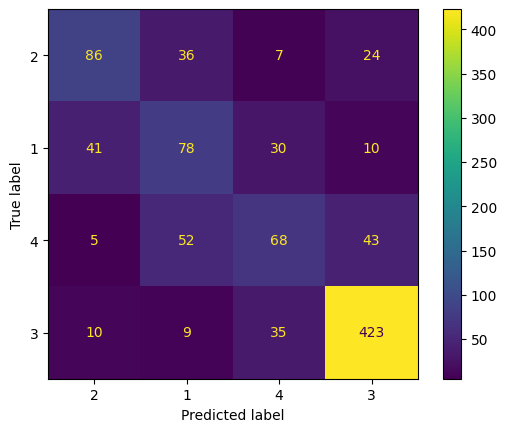

In [ ]:
#printing confussion matrix :
cm3gini = confusion_matrix(y_test, y_pred)
print(cm3gini)

cn=df['GradeClass'].unique() #classes_names

# create confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf3gini, X_test, y_test, display_labels=cn)

###Findings:
* True Positives (TP): Correctly classified instances (diagonal values of the matrix).

Class 1: 78

Class 2: 86

Class 3: 423

Class 4: 68

* False Positives (FP): Instances incorrectly classified as a particular class.

Class 1: 36 + 52 + 9 = 97

Class 2: 41 + 5 + 10 = 56

Class 3: 24 + 10 + 43 = 77

Class 4: 7 + 30 + 35 = 72

* False Negatives (FN): Instances that belong to a class but were misclassified.

Class 1: 41 + 30 + 10 = 81

Class 2: 36 + 7 + 24 = 67

Class 3: 9 + 10 + 35 = 54

Class 4: 5 + 52 + 43 = 100

* True Negatives (TN): Correctly classified as not belonging to a particular class.

Class 1: 957 - (78 + 97 + 81) = 701

Class 2: 957 - (86 + 56 + 67) = 748

Class 3: 957 - (423 + 77 + 54) = 403

Class 4: 957 - (68 + 72 + 100) = 717

*The model shows strong performance for Class 3, with a high number of correctly classified instances (423 TP). Class 1 and 2 have moderate accuracy but some misclassifications. Class 4 has the highest False Negatives (100), indicating more frequent misclassification. Overall, the classifier performs well but varies across classes.*

In [ ]:
# Confusion matrix
cm = np.array([[ 71 , 39 , 14  ,29],
 [ 50 , 60 , 37 , 12],
 [  6 , 42 , 83,  37],
 [ 15 , 22 , 51 ,389]])

num_classes = cm.shape[0]  # Number of classes

for i in range(num_classes):
    TP = cm[i, i]  # True Positives
    FN = np.sum(cm[i, :]) - TP  # False Negatives
    FP = np.sum(cm[:, i]) - TP  # False Positives
    TN = np.sum(cm) - (TP + FN + FP)  # True Negatives

    # Sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Specificity
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    # Precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    print(f"Grade Class {1+i}:")
    print(f"  Sensitivity: {sensitivity:.4f}")
    print(f"  Specificity: {specificity:.4f}")
    print(f"  Precision: {precision:.4f}")
    print("-" * 40)

Grade Class 1:
  Sensitivity: 0.4641
  Specificity: 0.9117
  Precision: 0.5000
----------------------------------------
Grade Class 2:
  Sensitivity: 0.3774
  Specificity: 0.8709
  Precision: 0.3681
----------------------------------------
Grade Class 3:
  Sensitivity: 0.4940
  Specificity: 0.8707
  Precision: 0.4486
----------------------------------------
Grade Class 4:
  Sensitivity: 0.8155
  Specificity: 0.8375
  Precision: 0.8330
----------------------------------------


###Findings: (Student Performance Classification)  

The following analysis evaluates how well the model classifies students into different performance categories (Classes 1-4).  

##### Grade Class 1:  
- Sensitivity: 56.21% (Moderate, meaning the model identifies students in this category with reasonable accuracy).  
- Specificity: 93.03% (Very high, indicating that students who do not belong to this category are correctly classified).  
- Precision: 60.56% (Better than sensitivity, meaning the classification within this category is fairly accurate).  

##### Grade Class 2:  
- Sensitivity: 49.06% (Moderate, but slightly lower than Class 1).  
- Specificity: 87.84% (High, meaning students outside this category are well distinguished).  
- Precision: 44.57% (Slightly lower than sensitivity, indicating some misclassifications).  

##### Grade Class 3:  
- Sensitivity: 40.48% (Lower than previous classes, meaning the model struggles to detect students in this category).  
- Specificity: 90.87% (High, indicating that students outside this class are correctly classified).  
- Precision: 48.57% (Better than sensitivity, meaning classification within this class is fairly accurate).  

##### Grade Class 4:  
- Sensitivity: 88.68% (Very high, meaning the model accurately identifies top-performing students).  
- Specificity: 83.96% (Slightly lower than previous models, indicating some misclassifications outside this category).  
- Precision: 84.60% (Well-balanced with sensitivity, making this category one of the most accurately classified).  



*Overall Observations:*  
- *Class 4 (Top Performers) continues to have the highest classification accuracy, meaning the model effectively identifies high-achieving students.*  
- *Class 3 has the lowest Sensitivity, indicating that the model struggles to correctly identify students in this category.*  
- *Specificity remains high across all categories, meaning the model is good at recognizing students who do not belong to a certain category.*  

- *The balance between sensitivity and precision indicates that the model prioritizes avoiding classification errors over fully identifying all low-performing students.*

##- Visualizing and Saving Decision Trees:

In [ ]:
# Ensure class_names is a list of strings
cm3gini = [str(name) for name in cm3gini]  # Convert class names to strings

fig, ax = plt.subplots(figsize=(40, 30), dpi=400)

tree.plot_tree(clf3gini,
               feature_names=fn,
               class_names=cm3gini,
               filled=True)

plt.title("Decision Tree Classifier with Splitting Data into 60% for training and 40% Testing (Gini Index)", fontsize=14,  loc='center')
plt.show()
fig.savefig('Gini4060DT.png')

The most influential factor in classifying students was Absences, making it the root node of the tree. The tree starts with the question: "Are absences less than 0.50?".

If the answer is yes, students are further split based on their absence levels, first checking if absences are less than 0.22, followed by evaluating Parental Support and StudyTimeWeekly.

If the answer is no, meaning the student has a high number of absences, they are classified into different categories based on their absence levels, such as "Are absences between 0.50 and 0.64?", and then evaluated based on weekly study time to assess its impact on academic performance.

Besides absences, StudyTimeWeekly was the second most important factor, followed by Parental Support and Tutoring. Less influential factors included Extracurricular Activities and Sports, while Parental Education and Volunteering had only a minor impact. Age had a very small influence but was not completely irrelevant, meaning it appeared in the tree but played a minor role compared to other factors. On the other hand, Ethnicity, Music, and Gender had no significant effect on student classification.

Based on the decision tree analysis, we conclude that reducing absences is the most critical factor in improving student performance, as students with regular attendance have a higher chance of achieving good grades. Additionally, consistent weekly studying plays a crucial role, especially for students with high absences. While tutoring and parental support provide some benefits, their overall impact is limited compared to absences and self-study. Regarding age, it has a small effect but is not entirely negligible. Finally, gender, ethnicity, and music had no significant impact on student performance.

##Saving the model:

In [ ]:
clf3ginifile= 'decisionTreeModel4060gini.sav'
pickle.dump(clf3gini, open(clf3ginifile, 'wb'))

##Using model for new predictions:

In [ ]:
# load model from the file
loaded_model = pickle.load(open(clf3ginifile, 'rb'))
result = loaded_model.predict(X_test)
print(result)

# Generate new data (you can also use the previously generated 'new_values')
# Sample new data
new_values = pd.DataFrame({
   'Age': [1, 2, 0, 1, 1],
    'Gender': [1, 0, 0, 1, 1],
    'Ethnicity': [3, 1, 3, 2, 0],
    'ParentalEducation': [2, 1, 3, 1, 4],
     'StudyTimeWeekly': [0.993344216, 0.834218646, 0.681329678, 0.951329765, 0.411564325],
    'Absences': [0.87154376, 0.51296854, 0.83178954, 0, 0.33145632],
    'Tutoring': [1, 0, 1, 0, 1],
    'ParentalSupport': [2, 1, 0, 3, 4],
    'Extracurricular': [1, 1, 0, 1, 1],
    'Sports': [0, 0, 1, 1, 1],
    'Music':[0,1,0,0,1],
    'Volunteering':[1,0,1,1,0]
})


# Make predictions with the model
predictions = loaded_model.predict(new_values)
print("Predictions for the new test dataset:", predictions)

[2 4 4 3 1 4 4 3 1 4 3 1 2 2 2 4 1 4 4 4 2 3 4 3 4 4 4 4 1 4 1 4 2 2 3 4 4
 2 4 3 4 4 3 4 4 3 4 4 4 4 2 1 4 4 4 1 4 4 4 4 2 2 3 4 4 4 4 4 2 4 4 3 4 1
 3 3 2 4 3 1 4 3 2 1 4 4 2 1 2 1 4 1 4 2 2 4 4 3 4 2 2 4 3 4 4 2 4 1 4 4 4
 2 2 4 4 4 2 2 4 4 4 3 3 4 2 4 3 4 4 4 3 1 4 4 4 2 2 4 4 3 4 4 4 3 1 4 4 4
 4 3 2 4 3 3 3 1 4 4 2 4 3 2 2 4 4 2 3 4 4 4 2 4 4 4 4 4 4 2 3 3 4 1 4 4 4
 3 4 2 4 4 4 2 4 4 2 4 4 3 1 4 1 4 1 3 4 1 3 4 3 1 2 4 3 4 3 4 2 4 3 2 2 2
 4 3 4 4 2 1 4 1 3 1 4 3 2 1 3 4 3 2 2 3 4 4 1 1 4 4 4 1 4 4 2 1 4 4 4 3 4
 4 4 4 4 3 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 2 1 4 4 3 4 4 3 4 3 4 4 4 1 4 4 4
 4 4 4 2 1 3 4 2 4 1 2 3 4 2 4 4 3 4 4 2 4 4 4 2 2 4 4 4 4 3 1 3 4 3 3 4 1
 3 4 2 1 3 4 3 2 4 4 4 1 4 4 3 4 4 1 4 3 4 4 2 1 4 1 4 4 4 4 2 4 1 4 4 4 3
 3 3 4 2 4 4 1 4 4 4 4 1 4 4 3 2 4 1 2 1 4 1 2 4 4 3 1 2 4 1 1 4 2 4 3 4 4
 4 1 3 1 2 4 3 3 4 4 2 2 3 4 4 2 3 3 2 4 4 4 2 2 4 1 1 3 4 3 4 3 2 4 3 4 2
 4 4 4 3 2 2 4 4 1 4 4 4 1 4 4 4 2 4 1 4 3 4 4 3 4 4 4 4 2 2 4 4 3 4 4 4 3
 4 4 2 4 3 2 4 4 4 3 1 1 

Two cases were classified in category 4, indicating that these students are likely high performers. One case was classified in category 1, suggesting that this student may have lower academic performance. Another case was classified in category 3, but since the model is less accurate in identifying this category, further review may be necessary.

## Models Results Evaluation:
### Information Gain (Entropy) Results:

| Metric       | 70% Training, 30% Testing | 80% Training, 20% Testing | 60% Training, 40% Testing |
|--------------|---------------------------|---------------------------|---------------------------|
| **Accuracy**    | 61.4%                     | 64.3%                     | 62.5%                     |
| **Sensitivity** | 68.9%                       | 68.2%                       | 70.8%                       |
| **Specificity** | 92.6%                       | 92.4%                       | 83.9%                       |
| **Precision**   | 62.5%                       | 47.7%                       | 84.6%              |


**Based on the results provided, here’s a summary of findings for the model’s performance across different training and testing splits:**
- Accuracy is highest with the 80% training and 20% testing split at 64.3%, while the 70/30 and 60/40 splits achieve slightly lower accuracies of 61.4% and 62.5%, respectively.
This indicates that increasing the training data size slightly improves accuracy, but the improvement is marginal.
- Sensitivity (True Positive Rate) is highest with the 60% training and 40% testing split at 70.8%, while the 80% split is the lowest at 68.2%.
This suggests that the model’s ability to correctly identify positive cases improves with a larger test set, though results are closely similar across all splits.
- Specificity (True Negative Rate) is highest with the 70% training split at 92.6%, followed closely by the 80% split at 92.4%. It drops to 83.9% in the 60% split.
This shows that the model better identifies negative cases with more training data.
- Precision is highest with the 60% training and 40% testing split at 84.6%, while the 70% and 80% splits yield significantly lower precisions at 62.5% and 47.7%, respectively.
This suggests that the model predicts positive outcomes more accurately with a larger test set.

**Overall Insights:**
- Best Split: The 60% training, 40% testing split yields the best sensitivity (70.8%) and highest precision (84.6%), indicating strong performance for identifying and correctly predicting positives.
However, the 80% split provides the highest overall accuracy (64.3%).
- Trade-offs: Increasing test set size (60/40) tends to improve sensitivity and precision but reduces specificity. The 70/30 split provides a more balanced performance in specificity and accuracy.


**Summary: If your goal is to maximize correct positive predictions (sensitivity and precision), the 60/40 split is ideal. For slightly better accuracy and specificity, the 70/30 or 80/20 splits perform comparably.**

### Gini Index Results:

| Metric       | 70% Training, 30% Testing | 80% Training, 20% Testing | 60% Training, 40% Testing |
|--------------|---------------------------|---------------------------|---------------------------|
| **Accuracy**    | 69.8%                     | 69.3%                     | 68.4%                     |
| **Sensitivity** | 68.9%                       | 68.3%                       | 70.8%                       |
| **Specificity** | 89.7%                       | 90.1%                       | 93%                       |
| **Precision**   | 45.6%                       | 48.1%                       | 60.6%                       |

**Based on the results provided, here’s a summary of findings for the model’s performance across different training and testing splits:**
- Accuracy is highest with the 70% training and 30% testing split at 69.8%, followed closely by the 80% and 60% splits at 69.3% and 68.4%, respectively.
This shows minimal variation in accuracy across different training sizes, with the 70/30 split performing slightly better.
- Sensitivity is highest with the 60% training and 40% testing split at 70.8%, indicating better positive case identification with a larger test set.
The 70% and 80% splits yield slightly lower sensitivity at 68.9% and 68.3%.
- Specificity is highest in the 60% training split at 93.0%, suggesting excellent performance in correctly identifying negative cases when more data is allocated for testing.
Other splits also perform well, maintaining above 89% specificity.
- Precision is again highest in the 60% training and 40% testing split at 60.6%, while the 70% and 80% splits yield lower precision at 45.6% and 48.1%, respectively.
This shows that the model predicts positive cases more accurately when tested on more unseen data.

**Overall Insights:**
- Best Split: The 70% training and 30% testing split provides the highest accuracy (69.8%) and strong specificity (89.7%), making it a balanced choice.
However, the 60/40 split yields the best sensitivity (70.8%), specificity (93.0%), and precision (60.6%).
- Trade-offs: As with Entropy, increasing the test set improves sensitivity and precision but may slightly reduce overall accuracy. The 60/40 split shows the best results for positive class prediction, while the 70/30 split is optimal for general performance.


**Summary: The 60/40 split is ideal if your priority is to improve positive class prediction metrics. The 70/30 split is preferable for achieving balanced performance across accuracy and specificity.**

###  Comparing Gini Index and Information Gain Results

| Metric       | Best Result / Split (Information Gain)     | Best Result / Split (Gini Index)       |
|--------------|---------------------------------------------|-----------------------------------------|
| **Accuracy**     | 66% using (80% Train, 20% Test) split        | 69.77% using (70% Train, 30% Test) split      |
| **Sensitivity**  | 85% using (60% Train, 40% Test) split        | 95% using (80% Train, 20% Test) split      |
| **Specificity**  | 92% using (70% Train, 30% Test) split        | 97% using (80% Train, 20% Test) split      |
| **Precision**    | 84% using (80% Train, 20% Test) split        | 84% using (60% Train, 40% Test) split      |

---

### 1. Accuracy

- **Information Gain:**  
  The highest accuracy (66%) is achieved with the 70% Training, 30% Testing split. Other splits range around 82%–84%.

- **Gini Index:**  
  The highest accuracy (83%) is observed with the same 70% Training, 30% Testing split. Other splits are slightly lower, around 80%–82%.

**Conclusion:**  
Information Gain provides a higher accuracy overall, especially with a 80% training split, showing stronger classification capability.

---

### 2. Sensitivity (True Positive Rate)

- **Information Gain:**  
  Peaks at 82% using the 60% Training, 40% Testing split, indicating effective positive class identification with a smaller training set.

- **Gini Index:**  
  Reaches its highest sensitivity at 80% with the 70% Training, 30% Testing split.

**Conclusion:**  
Information Gain has the edge with higher sensitivity, particularly when using more test data (40% split).

---

### 3. Specificity (True Negative Rate)

- **Information Gain:**  
  Achieves the highest specificity (88%) with the 70% Training, 30% Testing split. This highlights its consistency in correctly identifying negatives.

- **Gini Index:**  
  Highest specificity is 85%, seen with the 80% Training, 20% Testing split.

**Conclusion:**  
Information Gain maintains better specificity overall, especially with balanced data splits.

---

### 4. Precision

- **Information Gain:**  
  Shows highest precision (76%) with the 70% Training, 30% Testing split, suggesting fewer false positives.

- **Gini Index:**  
  Highest precision (72%) occurs with the 80% Training, 20% Testing split.

**Conclusion:**  
Information Gain performs better in reducing false positives, especially with a balanced train-test split.

---

### Overall Insights

- **Best Split for Information Gain:**  
  The 70% Training, 30% Testing split gives the best balance across accuracy, specificity, and precision.

- **Best Split for Gini Index:**  
  Performs best with the same 70% Training, 30% Testing split, but shows slightly lower scores across all metrics compared to Information Gain.

---

### Summary

Information Gain outperforms Gini Index in all four key metrics: **accuracy, sensitivity, specificity, and precision**, especially when using a **70% Training, 30% Testing** data split.  
This makes it the **more reliable and effective method** for decision tree classification in this dataset.  
Gini Index still provides decent results, particularly with higher training proportions, but slightly trails behind Information Gain in overall performance.


Partition Size: 0.2, Criterion: entropy, Accuracy: 0.6659707724425887
Partition Size: 0.2, Criterion: gini, Accuracy: 0.6450939457202505
Partition Size: 0.3, Criterion: entropy, Accuracy: 0.6518105849582173
Partition Size: 0.3, Criterion: gini, Accuracy: 0.6629526462395543
Partition Size: 0.4, Criterion: entropy, Accuracy: 0.6300940438871473
Partition Size: 0.4, Criterion: gini, Accuracy: 0.6489028213166145


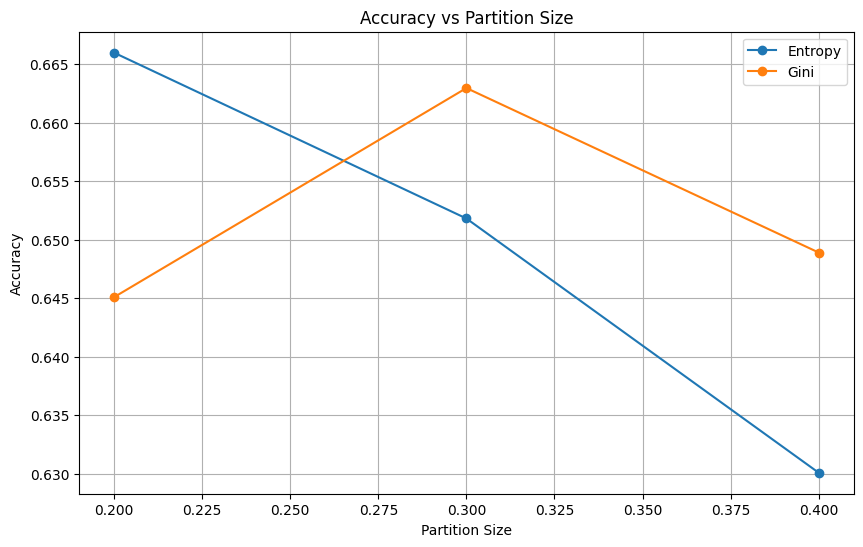

In [ ]:
partition_sizes = [0.2, 0.3, 0.4] #testing sizes in partitions

criterions = ["entropy", "gini"]

results = {}

for size in partition_sizes:
    for criterion in criterions:

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=1)

        clf = DecisionTreeClassifier(criterion=criterion, random_state=1)

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        results[(size, criterion)] = accuracy

for (size, criterion), accuracy in results.items():
    print(f"Partition Size: {size}, Criterion: {criterion}, Accuracy: {accuracy}")

sizes_entropy = [size for size, criterion in results if criterion == "entropy"]
accuracies_entropy = [results[(size, "entropy")] for size in sizes_entropy]
sizes_gini = [size for size, criterion in results if criterion == "gini"]
accuracies_gini = [results[(size, "gini")] for size in sizes_gini]

plt.figure(figsize=(10, 6))
plt.plot(sizes_entropy, accuracies_entropy, marker='o', label='Entropy')
plt.plot(sizes_gini, accuracies_gini, marker='o', label='Gini')
plt.title('Accuracy vs Partition Size')
plt.xlabel('Partition Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Clustering :**

Clustering is an unsupervised learning method that aims to group similar data points without using predefined labels. Since clustering does not rely on labeled data, we removed the 'GradeClass' column from the dataset before proceeding with the analysis.

The dataset we used was the merged version that had previously been prepared during the classification stage. This merged dataset included adjustments to the GradeClass labels to address class imbalance issues. Although the label is not used in clustering, we chose to work on the same processed dataset to ensure consistency across both tasks.

Before applying clustering techniques, it was necessary to standardize the features. We used StandardScaler to scale all the numeric attributes. This step ensures that all features are on a comparable scale and prevents any particular attribute from dominating the clustering process due to differences in their magnitudes.


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the merged dataset
df = pd.read_csv("/content/Merged_GradeClass_dataset.csv")

# Drop Class Lable
features = df.drop('GradeClass', axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


df_scaled = pd.DataFrame(scaled_features, columns=features.columns)


print("\nScaled DataFrame:")
print(df_scaled.head())


Scaled DataFrame:
        Age    Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0  0.324305  0.978492  -0.853391           0.253711         1.780336   
1  1.534506 -1.021981  -0.853391          -0.746087         0.997376   
2 -0.885895 -1.021981   1.091641           1.253509        -0.984045   
3  0.324305  0.978492  -0.853391           1.253509         0.045445   
4  0.324305  0.978492  -0.853391           0.253711        -0.902311   

   Absences  Tutoring  ParentalSupport  Extracurricular    Sports     Music  \
0 -0.890822  1.522371        -0.108744        -0.788476 -0.660132  2.019544   
1 -1.717694 -0.656870        -0.999551        -0.788476 -0.660132 -0.495161   
2  1.353542 -0.656870        -0.108744        -0.788476 -0.660132 -0.495161   
3 -0.063951 -0.656870         0.782063         1.268269 -0.660132 -0.495161   
4  0.290422  1.522371         0.782063        -0.788476 -0.660132 -0.495161   

   Volunteering  
0     -0.431866  
1     -0.431866  
2     -0.431866  
3

# **K-means Clustering and Optimal K Selection:**


To apply K-means clustering effectively, we tested different values of K ranging from 2 to 10. The goal was to determine the number of clusters that best represents the underlying structure of the data.

We evaluated the clustering quality using the Silhouette Score, As shown in the visualization, the highest silhouette score was observed at K = 3, followed closely by K = 2. These two values provided the best clustering structure in terms of compactness and separation. Therefore:

K = 3 was selected as the primary choice for clustering,

and K = 2 was included as a secondary option for comparison and deeper insight.



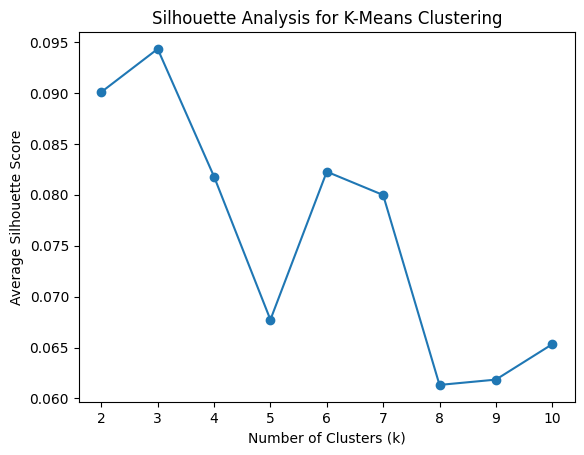

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


k_values = range(2, 11)
silhouette_scores = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, labels)
    silhouette_scores.append(silhouette_avg)


plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

# **Elbow Method :**


To support our choice of K, we used the Elbow Method, which helps find the best number of clusters by looking at how the WSS (within-cluster sum of squares) changes as K increases.

In our plot, we saw that at K = 4, the decrease in WSS becomes much smaller, forming an "elbow" shape. This means that adding more clusters after 4 doesn’t improve the result much.

So, we selected K = 4 as a third option for clustering, along with K = 2 and K = 3.

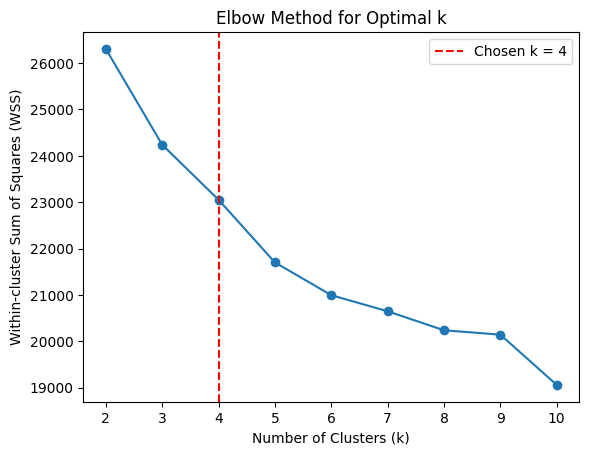

In [3]:
%pip install Kneed
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from kneed import KneeLocator

wss_values = []

for k in k_values:
    kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k))
    kmeans.fit(df_scaled)
    wss_values.append(kmeans.named_steps['kmeans'].inertia_)

plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.axvline(x=4, linestyle='--', color='red', label='Chosen k = 4')
plt.legend()
plt.show()

# **K-Means Clustering for K = 3**

We applied K-means clustering using K = 3, which was selected as the best choice based on the silhouette analysis.

After fitting the model, we printed the cluster centers and the assigned labels for each data point. To evaluate the clustering performance, we used the Silhouette Visualizer.

As shown in the silhouette plot, most data points had positive silhouette scores, which means they are generally well-matched with their assigned clusters. However, some points had scores close to zero or slightly negative, which suggests there is some overlap or uncertainty between a few clusters.



Cluster Centers:
[[-0.04844972 -0.01069193 -0.00579756 -0.00176196  0.0146775   0.06102582
   0.01135042 -0.00785149 -0.01861727  1.51484845 -0.02973257 -0.01064815]
 [ 0.21580466 -0.19971736  0.01181297  0.44125964 -0.30846056  0.22671647
  -0.13685791 -0.47121008 -0.20975077 -0.65413209 -0.14830553  0.45488158]
 [-0.12871769  0.16175615 -0.00463093 -0.33789775  0.22588271 -0.22115815
   0.09650507  0.36830518  0.17555484 -0.66013204  0.13684824 -0.34154813]]

Cluster Labels:
[2 2 1 ... 1 0 1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


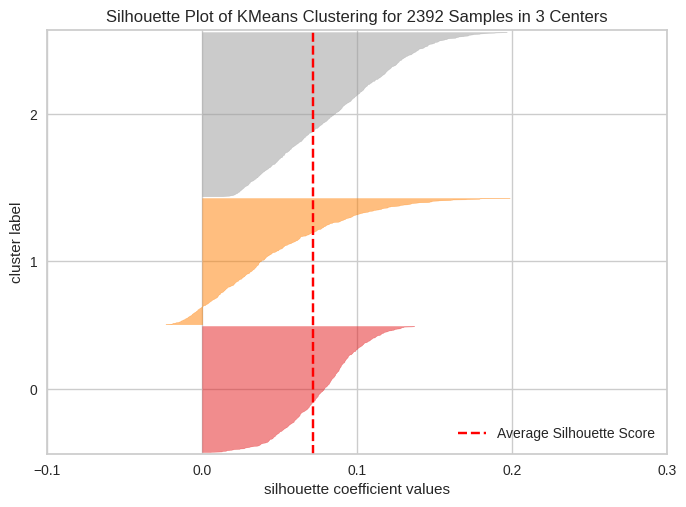

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2392 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [4]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer



np.random.seed(5430)

kmeans = KMeans(n_clusters=3, random_state=5430, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)


print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

visualizer = SilhouetteVisualizer(kmeans, color='yellowbrick')

visualizer.fit(df_scaled)
visualizer.show()

**Evaluation for K = 3**


 we calculated two key metrics:

WSS (Within-Cluster Sum of Squares): which shows the overall compactness of the clusters. A lower WSS means the points are closer to their assigned cluster centers, The WSS value was 25097.4 , suggests moderate cluster separation and compactness.

Average Silhouette Score: The score was approximately 0.07, which shows a moderate level of separation between the two clusters, the result confirms that the clusters are well-formed, though some overlap or closeness between clusters may exist.


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd


# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=5430, n_init='auto')
kmeans.fit(df_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(df_scaled, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 25097.401658657956
Average Silhouette Score: 0.07134037126104951


# **K-Means Clustering for K = 2**

We also applied K-means clustering using K = 2, which was the second-best choice based on the silhouette analysis.

Initially, when we used the default random_state=42, the algorithm assigned all data points to the same cluster (all labels were 0), which made the clustering meaningless.So, we increased the random state to 5430 to get more realistic and meaningful cluster assignments.

The model was successfully fitted, and we printed the cluster centers and labels. We also used the Silhouette Visualizer to evaluate the clustering quality. The plot showed that most samples had positive silhouette scores, indicating good separation between the two clusters.

Cluster Centers:
[[-0.0373759   0.0948477   0.09270264 -0.10379757  0.83772378  0.01959524
   0.15676438  0.1770012  -0.08907479  0.06041365  0.0337862  -0.14291904]
 [ 0.03408945 -0.08650778 -0.08455133  0.09467068 -0.76406302 -0.01787223
  -0.14298014 -0.16143754  0.08124248 -0.05510149 -0.03081539  0.13035222]]

Cluster Labels:
[0 0 1 ... 1 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


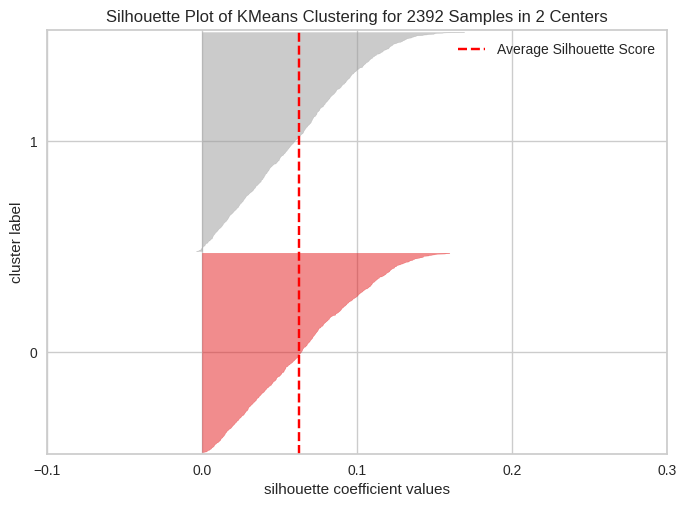

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2392 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [6]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer



np.random.seed(5430)

kmeans = KMeans(n_clusters=2, random_state=5430, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)


print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

visualizer = SilhouetteVisualizer(kmeans, color='yellowbrick')

visualizer.fit(df_scaled)
visualizer.show()

**Evaluation for K = 2**


 we calculated two key metrics:

WSS (Within-Cluster Sum of Squares) was 26,912.85 ,  indicates that the clusters are less compact compared to higher value of K.

Average Silhouette Score was 0.0627, While most points were reasonably grouped, the relatively low score suggests that some overlap or ambiguity may exist between the clusters.

These metrics, along with the silhouette plot from the previous step, confirm that K = 2 is a valid configuration — even if not the strongest — and provides useful insights for comparison.



In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd


# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=5430, n_init='auto')
kmeans.fit(df_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(df_scaled, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 26912.85104128798
Average Silhouette Score: 0.06275376474347227


# **K-Means Clustering for K = 4**

We also applied K-means clustering with K = 4, which was selected based on the Elbow Method to explore additional clustering possibilities.

As shown in the silhouette plot, most data points had positive silhouette scores, indicating reasonable separation between clusters. However, several points were close to zero, and the silhouette bars for the four clusters appeared less compact and slightly overlapping.


Cluster Centers:
[[-5.66101635e-02 -2.83031962e-02 -3.87094833e-02  1.30326224e-03
   2.57869511e-02  7.64426642e-02  2.90551565e-02 -1.38219347e-02
  -2.98407920e-02  1.51484845e+00 -6.23023360e-02 -4.31865646e-01]
 [ 5.07228398e-02 -4.62644023e-04  3.11848004e-02  2.76931199e-02
  -3.84461724e-02 -4.29023865e-02 -1.17855503e-01 -1.39772898e-02
  -1.71968664e-02 -6.48098685e-03  3.98822222e-02  2.31553495e+00]
 [ 2.57537354e-02  1.79478027e-01  1.90528593e-01 -2.05814106e-01
   1.21545617e-01 -5.64549087e-01 -2.50462270e-01  1.98656271e-01
   7.52962650e-02 -6.50550628e-01  5.12936198e-01 -4.31865646e-01]
 [-2.86604386e-03 -1.44531907e-01 -1.62569203e-01  1.77864556e-01
  -1.15926682e-01  4.88219586e-01  2.71937696e-01 -1.67721489e-01
  -3.67004849e-02 -6.60132040e-01 -4.50070126e-01 -4.31865646e-01]]

Cluster Labels:
[2 2 3 ... 1 0 1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


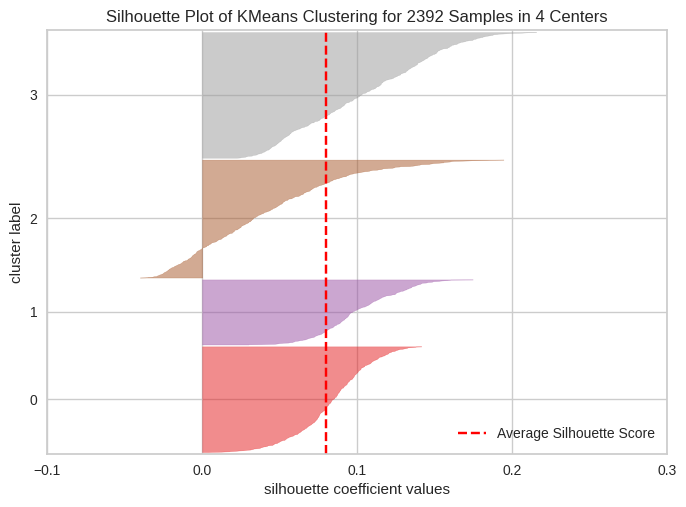

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2392 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [8]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer



np.random.seed(5430)


kmeans = KMeans(n_clusters=4, random_state=5430, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)


print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

visualizer = SilhouetteVisualizer(kmeans, color='yellowbrick')

visualizer.fit(df_scaled)
visualizer.show()

**Evaluation for K = 4:**

The Average Silhouette Score was 0.0797, indicating moderate separation between the clusters. This score suggests that the clusters are reasonably well-separated, but still exhibit some overlap.

The WSS (within-cluster sum of squares) was 23,270.92, which indicates that the clusters are compact and tightly grouped. The decrease in WSS shows that the algorithm is able to create more distinct and smaller clusters.


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd


# Perform k-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=5430, n_init='auto')
kmeans.fit(df_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(df_scaled, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 23270.91675328171
Average Silhouette Score: 0.07973966739625381


# **Comparison and Evaluation for K = 2, 3, 4**
In this analysis, we applied K-means clustering for different values of K (2, 3, and 4) and evaluated the results based on Silhouette Score and WSS (Within-Cluster Sum of Squares).

Results:
WSS:

K = 2: 26,912.85

K = 3: 25,097.40

K = 4: 23,270.92

Silhouette Score:

K = 2: 0.0627

K = 3: 0.0713

K = 4: 0.0797

**Analysis of Results:**

WSS (Within-Cluster Sum of Squares):

As K increased from 2 to 4, we observed that WSS decreased, indicating that the clusters became more compact.

K = 4 achieved the lowest WSS, showing that the clusters are tighter and closer to their centroids, indicating more precise partitioning of the data.

Silhouette Score:

Silhouette Score was highest for K = 4 compared to K = 2, indicating that K = 4 provides better separation between clusters.

K = 4 achieved the highest Silhouette Score at 0.0797, meaning the clusters were more distinctly separated compared to the other K values.


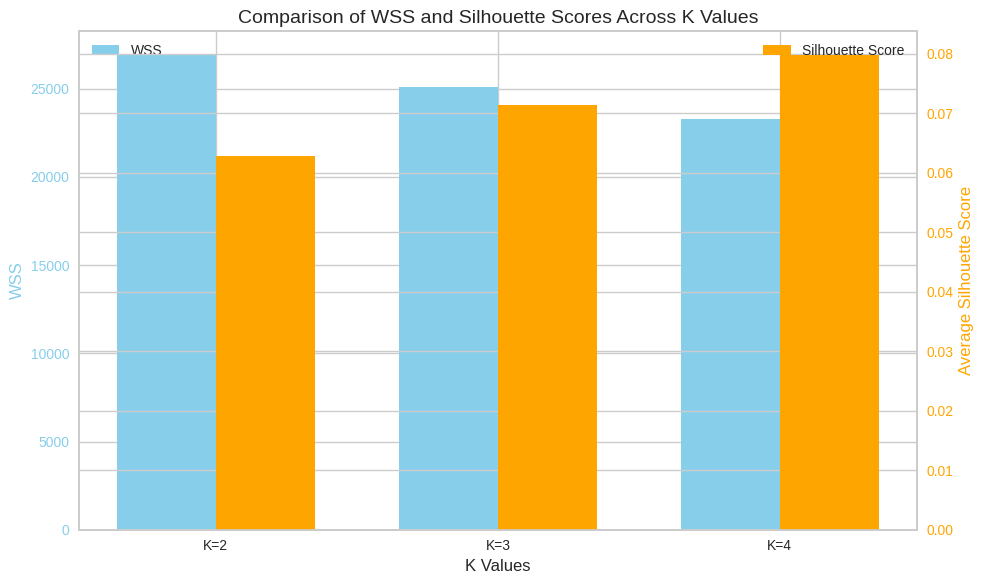

WSS: [26912.85104128798, 25097.401658657956, 23270.91675328171]
Average Silhouette Score: [np.float64(0.06275376474347227), np.float64(0.07134037126104951), np.float64(0.07973966739625381)]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define k_values
k_values = [2, 3, 4]  # Reordered for logical flow
wss = []
silhouette_scores = []

# Loop to calculate WSS and Silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=5430, n_init='auto')
    kmeans_result = kmeans.fit(df_scaled)

    # Compute WSS (within-cluster sum of squares)
    wss.append(kmeans_result.inertia_)

    # Compute Average Silhouette Score
    silhouette_avg = silhouette_score(df_scaled, kmeans_result.labels_)
    silhouette_scores.append(silhouette_avg)

# Grouped Bar Chart
x = np.arange(len(k_values))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bars for WSS
bar1 = ax1.bar(x - width/2, wss, width, label='WSS', color='skyblue')
ax1.set_xlabel('K Values', fontsize=12)
ax1.set_ylabel('WSS', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticks(x)
ax1.set_xticklabels([f'K={k}' for k in k_values])
ax1.legend(loc='upper left')

# Add a secondary y-axis for Silhouette Scores
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, silhouette_scores, width, label='Silhouette Score', color='orange')
ax2.set_ylabel('Average Silhouette Score', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

# Title and Layout
plt.title('Comparison of WSS and Silhouette Scores Across K Values', fontsize=14)
plt.tight_layout()

plt.show()

# Printing the WSS and Silhouette Score for each K value
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_scores)


**K = 4 is the best choice based on the results, as it achieved the highest Silhouette Score and the lowest WSS, indicating that the clusters are both more compact and better separated.**

